# I. Análisis univariado sacarosa

Las columnas que arrancan: 


- 201 -> del laboratorio del ingenio especifico: se toma cada hora.
- 100 -> del proceso de molienda: se toman cada minuto y se toman por sensores.


¿Cómo la presion del molino puede tener un efecto sobre esa variable objetivo?

bagazo vs presion
bagazo vs temperatura de agua



In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path


In [ ]:
!pip install matplotlib

In [ ]:
!pip install pandas

**Centro de investigación cenicaña:**

Estudiar los datos que nos brinda los laboratorios para el proceso de elaboración de azúcar.

**Proceso de elaboración de azúcar:**
1.	Proceso de molienda
2.	Clarificación
3.	Evaporización
4.	Cristalización 
5.	Generación de vapor quemando el bagazo para generar energía

Recolectan datos de laboratorio cada hora

**Variables:**
* PH del jugo oscila entre > 6.8 <7.4, si está muy elevado hay degradación de sacarosa. El ph depende de la adición de cal, es difícil de mantener.
* Flujo de jugo diluido
* Temperatura
* Color
* Turbiedad
* Presión en los diferentes equipos
* Brix del jugo.


Estimar las pérdidas de sacarosa, la que finalmente se convierte en cristales de azúcar
Ver como las otras variables afectan de manera negativa a la sacarosa.


In [8]:
df = pd.read_csv('DatosAreaMolinosRed.csv', sep=";")

In [5]:
df

Time  201_LECBRIXSOLUT2  201_PUREZAJUGDILT2  \
0      07/09/2025 0:00                NaN                 NaN   
1      07/09/2025 0:00                NaN                 NaN   
2      07/09/2025 0:01                NaN                 NaN   
3      07/09/2025 0:02                NaN                 NaN   
4      07/09/2025 0:03                NaN                 NaN   
...                ...                ...                 ...   
45714  8/15/2025 23:54                NaN                 NaN   
45715  8/15/2025 23:56                NaN                 NaN   
45716  8/15/2025 23:57                NaN                 NaN   
45717  8/15/2025 23:58                NaN                 NaN   
45718  8/15/2025 23:59                NaN                 NaN   

       201_%PUREZJUGO1EXT2  201_%HUMBZOT2  BZSAC  201_%REDUCTOJDILT2  \
0                     84.7           46.0   0.95                 NaN   
1                      NaN            NaN    NaN                 NaN   
2                      NaN            NaN    NaN                 NaN   
3                      NaN            NaN    NaN                 NaN   
4                      NaN            NaN    NaN                 NaN   
...                    ...            ...    ...                 ...   
45714                  NaN            NaN    NaN                 NaN   
45715                  NaN            NaN    NaN                 NaN   
45716                  NaN            NaN    NaN                 NaN   
45717                  NaN            NaN    NaN                 NaN   
45718                  NaN            NaN    NaN                 NaN   

       201_PHJUGODILUIDOT2  201_FOSFATOSJDILT2  201_COLORJUGODILT2  ...  \
0                      NaN                 NaN                 NaN  ...   
1                      NaN                 NaN                 NaN  ...   
2                      NaN                 NaN                 NaN  ...   
3                      NaN                 NaN                 NaN  ...   
4                      NaN                 NaN                 NaN  ...   
...                    ...                 ...                 ...  ...   
45714                  NaN                 NaN                 NaN  ...   
45715                  NaN                 NaN                 NaN  ...   
45716                  NaN                 NaN                 NaN  ...   
45717                  NaN                 NaN                 NaN  ...   
45718                  NaN                 NaN                 NaN  ...   

       100_MURRAY3_ST_PV  100_MURRAY4_ST_PV  100_BOMBA_MACE01_IT_PV  \
0                    NaN                NaN                     NaN   
1                 3100.0             2916.0                    29.2   
2                 2810.0             2715.0                    28.8   
3                 2860.0             2696.0                    29.1   
4                 2989.0             2697.0                    28.6   
...                  ...                ...                     ...   
45714             3000.0             2695.0                     0.0   
45715             3000.0             2705.0                     0.0   
45716             3000.0             2695.0                     0.0   
45717             3000.0             2705.0                     0.0   
45718             2969.0             2695.0                     0.0   

       100_BOMBA_MACE04_IT_PV  100_BOMBA_MACE05_IT_PV  \
0                         NaN                     NaN   
1                        26.7                    29.1   
2                        29.7                    29.0   
3                        27.5                    30.4   
4                        29.1                    29.8   
...                       ...                     ...   
45714                     0.0                     0.0   
45715                     0.0                     0.0   
45716                     0.0                     0.0   
45717                     0.0                   

Al observar los datos delprimer dia, identifico que la variable objetivo (BZSAC - % SACAROSA BAGAZO TANDEM 2) tiene data cada 2 horas y en la mayoria cuando tiene datos tambien estas otras 4 variables: 

* 0	201_LECBRIXSOLUT2	Lectura Brix Solucion Jugo Diluido T2
* 1	201_PUREZAJUGDILT2	% PUREZA JUGO DILUIDO TANDEM 2
* 2	201_%PUREZJUGO1EXT2	%PUREZA JUGO PRIMERA EXTRACCION T2
* 4	201_%HUMBZOT2	% HUMEDAD BAGAZO TANDEM 2

In [ ]:
!pip install openpyxl

In [9]:
df_variables = pd.read_excel('Diccionario.xlsx', sheet_name='Total_Variables')


In [8]:
df_variables[['Nombre ', 'Descripcion ']].drop_duplicates(subset=['Nombre '])

Nombre                            Descripcion 
0             LECBRIXSOLUT2  Lectura Brix Solucion Jugo Diluido T2
1            PUREZAJUGDILT2         % PUREZA JUGO DILUIDO TANDEM 2
2           %PUREZJUGO1EXT2     %PUREZA JUGO PRIMERA EXTRACCION T2
3                     BZSAC             % SACAROSA BAGAZO TANDEM 2
4                 %HUMBZOT2              % HUMEDAD BAGAZO TANDEM 2
5            %REDUCTOJDILT2           % REDUCTORES JUGO DILUIDO T2
6           PHJUGODILUIDOT2                     pH Jugo Diluido T2
7            FOSFATOSJDILT2               FOSFATOS JUGO DILUIDO T2
8            COLORJUGODILT2   COLOR FILTRADO JUGO DILUIDO TANDEM 2
9           TURBIEDADJDILT2        TURBIEDAD JUGO DILUIDO TANDEM 2
10    100_AG_IMBICION_TT_PV      Temperatura de agua de imbibicion
11       100_MOL1_DER_PT_PV         Presion hidraulica derecha #1 
12       100_MOL1_IZQ_PT_PV       Presion hidraulica izquierda #1 
13       100_MOL2_DER_PT_PV          Presion hidraulica derecha #2
14       100_MOL2_IZQ_PT_PV       Presion hidraulica izquierda #2 
15       100_MOL3_DER_PT_PV         Presion hidraulica derecha #3 
16       100_MOL3_IZQ_PT_PV       Presion hidraulica izquierda #3 
17       100_MOL4_DER_PT_PV         Presion hidraulica derecha #4 
18       100_MOL4_IZQ_PT_PV       Presion hidraulica izquierda #4 
19       100_MOL5_DER_PT_PV         Presion hidraulica derecha #5 
20       100_MOL5_IZQ_PT_PV       Presion hidraulica izquierda #5 
21       100_MOL6_DER_PT_PV         Presion hidraulica derecha #6 
22       100_MOL6_IZQ_PT_PV        Presion hidraulica izquierda #6
23             104_VE_PT_PV                  Presion vapor escape 
24   100_DESFIBRADORA_ST_PV         Velocidad Turbina Desfibradora
25        100_MURRAY3_ST_PV            Velocidad Turbina Murray #3
26        100_MURRAY4_ST_PV            Velocidad Turbina Murray #4
27   100_BOMBA_MACE01_IT_PV        Amperaje Bomba de maceracion 01
28   100_BOMBA_MACE04_IT_PV        Amperaje Bomba de maceracion 04
29   100_BOMBA_MACE05_IT_PV        Amperaje Bomba de maceracion 05
30             101_JD_FT_PV             Flujo de diluido a proceso
31  100_MACERACION_FIBRA_PV                       Maceracion Fibra
32        100_BANDA96_ST_PV  Velocidad Banda Alimentadora BANDA 96
33        100_MURRAY1_ST_PV            Velocidad Turbina Murray #1
34        100_MURRAY2_ST_PV            Velocidad Turbina Murray #2
35        100_MURRAY5_ST_PV            Velocidad Turbina Murray #5
36          100_MOL1_TQT_PV                      MOL1 Torque motor
37          100_MOL5_TQT_PV                      MOL5 Torque motor
38          100_MOL6_TQT_PV                      MOL6 Torque motor
39       100_AGUA_IMB_FT_PV               PV Flujo agua imbibicion
40        100_BAGAZO_POL_PV                    Pol bagazo molienda
41    100_BAGAZO_HUMEDAD_PV                Humedad bagazo molienda

In [10]:
df.head()

Time  201_LECBRIXSOLUT2  201_PUREZAJUGDILT2  \
0  07/09/2025 0:00                NaN                 NaN   
1  07/09/2025 0:00                NaN                 NaN   
2  07/09/2025 0:01                NaN                 NaN   
3  07/09/2025 0:02                NaN                 NaN   
4  07/09/2025 0:03                NaN                 NaN   

   201_%PUREZJUGO1EXT2  201_%HUMBZOT2  BZSAC  201_%REDUCTOJDILT2  \
0                 84.7           46.0   0.95                 NaN   
1                  NaN            NaN    NaN                 NaN   
2                  NaN            NaN    NaN                 NaN   
3                  NaN            NaN    NaN                 NaN   
4                  NaN            NaN    NaN                 NaN   

   201_PHJUGODILUIDOT2  201_FOSFATOSJDILT2  201_COLORJUGODILT2  ...  \
0                  NaN                 NaN                 NaN  ...   
1                  NaN                 NaN                 NaN  ...   
2                  NaN                 NaN                 NaN  ...   
3                  NaN                 NaN                 NaN  ...   
4                  NaN                 NaN                 NaN  ...   

   100_MURRAY3_ST_PV  100_MURRAY4_ST_PV  100_BOMBA_MACE01_IT_PV  \
0                NaN                NaN                     NaN   
1             3100.0             2916.0                    29.2   
2             2810.0             2715.0                    28.8   
3             2860.0             2696.0                    29.1   
4             2989.0             2697.0                    28.6   

   100_BOMBA_MACE04_IT_PV  100_BOMBA_MACE05_IT_PV  100_MACERACION_FIBRA_PV  \
0                     NaN                     NaN                      NaN   
1                    26.7                    29.1                     33.9   
2                    29.7                    29.0                     27.3   
3                    27.5                    30.4                     28.7   
4                    29.1                    29.8                     26.8   

   100_BANDA96_ST_PV  100_MURRAY1_ST_PV  100_MURRAY2_ST_PV  100_MURRAY5_ST_PV  
0                NaN                NaN                NaN                NaN  
1               48.0              798.0              681.0              656.0  
2               46.6              798.0              621.0              716.0  
3               46.6              798.0              641.0              656.0  
4               46.6              798.0              801.0              656.0  

[5 rows x 30 columns]

In [11]:
df.tail()

Time  201_LECBRIXSOLUT2  201_PUREZAJUGDILT2  \
45714  8/15/2025 23:54                NaN                 NaN   
45715  8/15/2025 23:56                NaN                 NaN   
45716  8/15/2025 23:57                NaN                 NaN   
45717  8/15/2025 23:58                NaN                 NaN   
45718  8/15/2025 23:59                NaN                 NaN   

       201_%PUREZJUGO1EXT2  201_%HUMBZOT2  BZSAC  201_%REDUCTOJDILT2  \
45714                  NaN            NaN    NaN                 NaN   
45715                  NaN            NaN    NaN                 NaN   
45716                  NaN            NaN    NaN                 NaN   
45717                  NaN            NaN    NaN                 NaN   
45718                  NaN            NaN    NaN                 NaN   

       201_PHJUGODILUIDOT2  201_FOSFATOSJDILT2  201_COLORJUGODILT2  ...  \
45714                  NaN                 NaN                 NaN  ...   
45715                  NaN                 NaN                 NaN  ...   
45716                  NaN                 NaN                 NaN  ...   
45717                  NaN                 NaN                 NaN  ...   
45718                  NaN                 NaN                 NaN  ...   

       100_MURRAY3_ST_PV  100_MURRAY4_ST_PV  100_BOMBA_MACE01_IT_PV  \
45714             3000.0             2695.0                     0.0   
45715             3000.0             2705.0                     0.0   
45716             3000.0             2695.0                     0.0   
45717             3000.0             2705.0                     0.0   
45718             2969.0             2695.0                     0.0   

       100_BOMBA_MACE04_IT_PV  100_BOMBA_MACE05_IT_PV  \
45714                     0.0                     0.0   
45715                     0.0                     0.0   
45716                     0.0                     0.0   
45717                     0.0                     0.0   
45718                     0.0                     0.0   

       100_MACERACION_FIBRA_PV  100_BANDA96_ST_PV  100_MURRAY1_ST_PV  \
45714                      0.0                0.0              758.0   
45715                      0.0                0.0              758.0   
45716                      0.0                0.0              758.0   
45717                      0.0                0.0              758.0   
45718                      0.0                0.0              758.0   

       100_MURRAY2_ST_PV  100_MURRAY5_ST_PV  
45714              580.0              776.0  
45715              580.0              776.0  
45716              580.0              776.0  
45717              580.0              776.0  
45718              580.0              776.0  

[5 rows x 30 columns]

In [11]:
df.shape

(45719, 30)

In [12]:
df.describe()

201_LECBRIXSOLUT2  201_PUREZAJUGDILT2  201_%PUREZJUGO1EXT2  \
count         432.000000          432.000000           290.000000   
mean           13.596528           83.093519            83.847586   
std             0.655735            1.985120             3.648246   
min            11.000000           74.400000            66.700000   
25%            13.200000           81.900000            82.300000   
50%            13.600000           83.300000            84.500000   
75%            14.000000           84.500000            86.200000   
max            15.600000           87.300000           102.000000   

       201_%HUMBZOT2       BZSAC  201_%REDUCTOJDILT2  201_PHJUGODILUIDOT2  \
count     429.000000  431.000000          115.000000            38.000000   
mean       45.537529    1.249861            0.861739             5.258158   
std         1.698299    0.209807            0.141788             0.219174   
min        40.900000    0.000000            0.000000             4.890000   
25%        44.300000    1.120000            0.780000             5.110000   
50%        45.400000    1.230000            0.850000             5.215000   
75%        46.500000    1.340000            0.970000             5.377500   
max        51.200000    2.700000            1.140000             5.990000   

       201_FOSFATOSJDILT2  201_COLORJUGODILT2  201_TURBIEDADJDILT2  ...  \
count           38.000000           43.000000            43.000000  ...   
mean           286.289474        22320.348837        171148.372093  ...   
std             31.953436         4738.917633         41046.703600  ...   
min            211.000000        13429.000000        130429.000000  ...   
25%            268.500000        19500.000000        141107.500000  ...   
50%            287.000000        23000.000000        159000.000000  ...   
75%            302.000000        24991.000000        178357.000000  ...   
max            385.000000        33000.000000        330166.000000  ...   

       100_MURRAY3_ST_PV  100_MURRAY4_ST_PV  100_BOMBA_MACE01_IT_PV  \
count       45278.000000       45278.000000            45278.000000   
mean         2888.188950        2724.570520               26.090017   
std           646.008398         546.251775                8.836082   
min             0.000000           0.000000                0.000000   
25%          2798.000000        2696.000000               28.200000   
50%          2972.000000        2778.000000               28.800000   
75%          3184.000000        2918.000000               29.300000   
max          4102.000000        3717.000000               62.300000   

       100_BOMBA_MACE04_IT_PV  100_BOMBA_MACE05_IT_PV  \
count            45278.000000            44937.000000   
mean                25.571693               27.216343   
std                  8.753546                8.970961   
min                  0.000000                0.000000   
25%                 27.600000               29.100000   
50%                 28.300000               29.800000   
75%                 28.900000               30.400000   
max                 44.100000               64.900000   

       100_MACERACION_FIBRA_PV  100_BANDA96_ST_PV  100_MURRAY1_ST_PV  \
count             45215.000000       45278.000000       45278.000000   
mean                 25.505450          44.164927         769.953472   
std                   8.889001          15.479112         163.878551   
min                   0.000000           0.000000           0.000000   
25%                  27.700000          46.600000         798.000000   
50%                  28.300000          47.500000         798.000000   
75%                  28.900000          48.500000         818.000000   
max                  44.000000         100.000000         857.000000   

       100_MURRAY2_ST_PV  100_MURRAY5_ST_PV  
count       45278.000000       45278.000000  
mean          657.243198         722.558022  
std           153.410276         162.119367  
min             0.000000    

Pregunta: Qué pasa cuando 201_PHJUGODILUIDOT2 (pH Jugo Diluido T2) esta por debajo de 6.8 ya que observo el min es 4.89 y el max es 5.99?

Habia entendido que esa variable (201_PHJUGODILUIDOT2) debe oscilar entre > 6.8 <7.4 y que si está muy elevada hay degradación de sacarosa. 
El ph depende de la adición de cal, es difícil de mantener.



In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45719 entries, 0 to 45718
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Time                     45719 non-null  object 
 1   201_LECBRIXSOLUT2        432 non-null    float64
 2   201_PUREZAJUGDILT2       432 non-null    float64
 3   201_%PUREZJUGO1EXT2      290 non-null    float64
 4   201_%HUMBZOT2            429 non-null    float64
 5   BZSAC                    431 non-null    float64
 6   201_%REDUCTOJDILT2       115 non-null    float64
 7   201_PHJUGODILUIDOT2      38 non-null     float64
 8   201_FOSFATOSJDILT2       38 non-null     float64
 9   201_COLORJUGODILT2       43 non-null     float64
 10  201_TURBIEDADJDILT2      43 non-null     float64
 11  100_AG_IMBICION_TT_PV    45277 non-null  float64
 12  100_MOL1_DER_PT_PV       45278 non-null  float64
 13  100_MOL1_IZQ_PT_PV       45278 non-null  float64
 14  100_MOL2_DER_PT_PV    

In [14]:
df["BZSAC"].isna().sum()

np.int64(45288)

**Se hace un sampleo** 

Se reducen los datos sacando la media de los datos cada 1hora para que los datos queden con el mismo tiempo de muestreo, lo que pasa es que hay datos cada minuto y otras variables cada 1 hora o cada tres horas. La cantidad de nulos no es porque falten, es por la periodicidad de toma de muestras, son datos de laboratorio y no hay estándar en toma de esas muestras, hay otros datos que corresponden a sensorica del proceso estos datos son cada minuto.

En el data set recibido se habia resampleado por cada hora, osea aplicó un reducido de los datos sacando el promedio de cada variable a 1 hora y por eso a continuacion se va a repetir lo mismo con el fin de reducir los valores nulos y el ruido por las variables tomadas de muestras minuto a minuto.

In [12]:
# Convertir la columna "Time" a tipo datetime
df["Time"] = pd.to_datetime(df["Time"], errors="coerce")

# Establecer "Time" como índice
df_resample = df.set_index("Time")

# Ejemplo: resamplear a intervalos de 1 hora y calcular la media
df_resample_1h = df_resample.resample("1H").mean()

# Mostrar las primeras filas del dataframe resampleado
df_resample_1h.head()


C:\Users\yeavi\AppData\Local\Temp\ipykernel_18400\2031679618.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_resample_1h = df_resample.resample("1H").mean()


201_LECBRIXSOLUT2  201_PUREZAJUGDILT2  \
Time                                                         
2025-07-09 00:00:00                NaN                 NaN   
2025-07-09 01:00:00                NaN                 NaN   
2025-07-09 02:00:00               13.6                84.8   
2025-07-09 03:00:00                NaN                 NaN   
2025-07-09 04:00:00               13.2                83.0   

                     201_%PUREZJUGO1EXT2  201_%HUMBZOT2  BZSAC  \
Time                                                             
2025-07-09 00:00:00                 84.7           46.0   0.95   
2025-07-09 01:00:00                  NaN            NaN    NaN   
2025-07-09 02:00:00                  NaN            NaN    NaN   
2025-07-09 03:00:00                  NaN            NaN    NaN   
2025-07-09 04:00:00                 86.4           45.1   1.21   

                     201_%REDUCTOJDILT2  201_PHJUGODILUIDOT2  \
Time                                                           
2025-07-09 00:00:00                 NaN                  NaN   
2025-07-09 01:00:00                 NaN                  NaN   
2025-07-09 02:00:00                 NaN                  NaN   
2025-07-09 03:00:00                 NaN                  NaN   
2025-07-09 04:00:00                 NaN                  NaN   

                     201_FOSFATOSJDILT2  201_COLORJUGODILT2  \
Time                                                          
2025-07-09 00:00:00                 NaN                 NaN   
2025-07-09 01:00:00                 NaN                 NaN   
2025-07-09 02:00:00                 NaN                 NaN   
2025-07-09 03:00:00                 NaN                 NaN   
2025-07-09 04:00:00                 NaN             25857.0   

                     201_TURBIEDADJDILT2  ...  100_MURRAY3_ST_PV  \
Time                                      ...                      
2025-07-09 00:00:00                  NaN  ...        3048.701754   
2025-07-09 01:00:00                  NaN  ...        3232.561404   
2025-07-09 02:00:00                  NaN  ...        3045.508772   
2025-07-09 03:00:00                  NaN  ...        3126.017544   
2025-07-09 04:00:00             177429.0  ...        2979.857143   

                     100_MURRAY4_ST_PV  100_BOMBA_MACE01_IT_PV  \
Time                                                             
2025-07-09 00:00:00        2835.789474               28.838596   
2025-07-09 01:00:00        3018.157895               29.252632   
2025-07-09 02:00:00        2936.192982               28.961404   
2025-07-09 03:00:00        2957.175439               29.228070   
2025-07-09 04:00:00        2913.500000               27.164286   

                     100_BOMBA_MACE04_IT_PV  100_BOMBA_MACE05_IT_PV  \
Time                                                                  
2025-07-09 00:00:00               28.275439               29.668421   
2025-07-09 01:00:00               28.468421               30.321053   
2025-07-09 02:00:00               28.263158               29.912281   
2025-07-09 03:00:00               28.449123               30.173684   
2025-07-09 04:00:00               26.741071               27.835714   

                     100_MACERACION_FIBRA_PV  100_BANDA96_ST_PV  \
Time                                                              
2025-07-09 00:00:00                26.905263          49.091228   
2025-07-09 01:00:00                28.528070          49.080702   
2025-07-09 02:00:00                28.349123          46.133333   
2025-07-09 03:00:00                28.598246          46.138596   
2025-07-09 04:00:00                27.014286          44.037500   

                     100_MURRAY1_ST_PV  100_MURRAY2_ST_PV  100_MURRAY5_ST_PV  
Time                                                                          
2025-07-09 00:00:00              798.0         712.228070         690.035088  
2025-07-09 01:00:00              798.0         711.175439         809.701754  
2025-07-

**Se vuelven a analizar los datos con el nuevo dataframe resampleado**

In [16]:
df_resample_1h.shape

(912, 29)

In [17]:
df_resample_1h

201_LECBRIXSOLUT2  201_PUREZAJUGDILT2  \
Time                                                         
2025-07-09 00:00:00                NaN                 NaN   
2025-07-09 01:00:00                NaN                 NaN   
2025-07-09 02:00:00               13.6                84.8   
2025-07-09 03:00:00                NaN                 NaN   
2025-07-09 04:00:00               13.2                83.0   
...                                ...                 ...   
2025-08-15 19:00:00                NaN                 NaN   
2025-08-15 20:00:00               13.7                85.4   
2025-08-15 21:00:00                NaN                 NaN   
2025-08-15 22:00:00               13.6                84.3   
2025-08-15 23:00:00                NaN                 NaN   

                     201_%PUREZJUGO1EXT2  201_%HUMBZOT2  BZSAC  \
Time                                                             
2025-07-09 00:00:00                 84.7           46.0   0.95   
2025-07-09 01:00:00                  NaN            NaN    NaN   
2025-07-09 02:00:00                  NaN            NaN    NaN   
2025-07-09 03:00:00                  NaN            NaN    NaN   
2025-07-09 04:00:00                 86.4           45.1   1.21   
...                                  ...            ...    ...   
2025-08-15 19:00:00                  NaN            NaN    NaN   
2025-08-15 20:00:00                 87.3            NaN    NaN   
2025-08-15 21:00:00                  NaN            NaN    NaN   
2025-08-15 22:00:00                  NaN           43.7   1.42   
2025-08-15 23:00:00                  NaN            NaN    NaN   

                     201_%REDUCTOJDILT2  201_PHJUGODILUIDOT2  \
Time                                                           
2025-07-09 00:00:00                 NaN                  NaN   
2025-07-09 01:00:00                 NaN                  NaN   
2025-07-09 02:00:00                 NaN                  NaN   
2025-07-09 03:00:00                 NaN                  NaN   
2025-07-09 04:00:00                 NaN                  NaN   
...                                 ...                  ...   
2025-08-15 19:00:00                 NaN                  NaN   
2025-08-15 20:00:00                 NaN                  NaN   
2025-08-15 21:00:00                 NaN                  NaN   
2025-08-15 22:00:00                0.72                  NaN   
2025-08-15 23:00:00                 NaN                  NaN   

                     201_FOSFATOSJDILT2  201_COLORJUGODILT2  \
Time                                                          
2025-07-09 00:00:00                 NaN                 NaN   
2025-07-09 01:00:00                 NaN                 NaN   
2025-07-09 02:00:00                 NaN                 NaN   
2025-07-09 03:00:00                 NaN                 NaN   
2025-07-09 04:00:00                 NaN             25857.0   
...                                 ...                 ...   
2025-08-15 19:00:00                 NaN                 NaN   
2025-08-15 20:00:00                 NaN                 NaN   
2025-08-15 21:00:00                 NaN                 NaN   
2025-08-15 22:00:00                 NaN                 NaN   
2025-08-15 23:00:00                 NaN                 NaN   

                     201_TURBIEDADJDILT2  ...  100_MURRAY3_ST_PV  \
Time                                      ...                      
2025-07-09 00:00:00                  NaN  ...        3048.701754   
2025-07-09 01:00:00                  NaN  ...        3232.561404   
2025-07-09 02:00:00                  NaN  ...        3045.508772   
2025-07-09 03:00:00                  NaN  ...        3126.017544   
2025-07-09 04:00:00             177429.0  ...        2979.857143   
...                                  ...  ...                ...   
2025-08-15 19:00:00                  NaN  ...        2899.425926   
2025-08-15 20:00:00                  NaN  ...        2955.660377   
2025-08-15 21:00:00   

In [18]:
# Mostrar las ultimas filas del dataframe resampleado
df_resample_1h.tail()

201_LECBRIXSOLUT2  201_PUREZAJUGDILT2  \
Time                                                         
2025-08-15 19:00:00                NaN                 NaN   
2025-08-15 20:00:00               13.7                85.4   
2025-08-15 21:00:00                NaN                 NaN   
2025-08-15 22:00:00               13.6                84.3   
2025-08-15 23:00:00                NaN                 NaN   

                     201_%PUREZJUGO1EXT2  201_%HUMBZOT2  BZSAC  \
Time                                                             
2025-08-15 19:00:00                  NaN            NaN    NaN   
2025-08-15 20:00:00                 87.3            NaN    NaN   
2025-08-15 21:00:00                  NaN            NaN    NaN   
2025-08-15 22:00:00                  NaN           43.7   1.42   
2025-08-15 23:00:00                  NaN            NaN    NaN   

                     201_%REDUCTOJDILT2  201_PHJUGODILUIDOT2  \
Time                                                           
2025-08-15 19:00:00                 NaN                  NaN   
2025-08-15 20:00:00                 NaN                  NaN   
2025-08-15 21:00:00                 NaN                  NaN   
2025-08-15 22:00:00                0.72                  NaN   
2025-08-15 23:00:00                 NaN                  NaN   

                     201_FOSFATOSJDILT2  201_COLORJUGODILT2  \
Time                                                          
2025-08-15 19:00:00                 NaN                 NaN   
2025-08-15 20:00:00                 NaN                 NaN   
2025-08-15 21:00:00                 NaN                 NaN   
2025-08-15 22:00:00                 NaN                 NaN   
2025-08-15 23:00:00                 NaN                 NaN   

                     201_TURBIEDADJDILT2  ...  100_MURRAY3_ST_PV  \
Time                                      ...                      
2025-08-15 19:00:00                  NaN  ...        2899.425926   
2025-08-15 20:00:00                  NaN  ...        2955.660377   
2025-08-15 21:00:00                  NaN  ...        3407.672727   
2025-08-15 22:00:00                  NaN  ...        3136.509434   
2025-08-15 23:00:00                  NaN  ...        3191.611111   

                     100_MURRAY4_ST_PV  100_BOMBA_MACE01_IT_PV  \
Time                                                             
2025-08-15 19:00:00        2500.000000                0.000000   
2025-08-15 20:00:00        2579.433962                9.058491   
2025-08-15 21:00:00        2879.163636               29.152727   
2025-08-15 22:00:00        2671.320755               24.096226   
2025-08-15 23:00:00        2799.648148               14.942593   

                     100_BOMBA_MACE04_IT_PV  100_BOMBA_MACE05_IT_PV  \
Time                                                                  
2025-08-15 19:00:00                0.000000                0.000000   
2025-08-15 20:00:00                8.530189                9.541509   
2025-08-15 21:00:00               29.001818               31.016364   
2025-08-15 22:00:00               24.158491               25.733962   
2025-08-15 23:00:00               15.400000               16.220370   

                     100_MACERACION_FIBRA_PV  100_BANDA96_ST_PV  \
Time                                                              
2025-08-15 19:00:00                 0.000000           0.000000   
2025-08-15 20:00:00                 9.643396          21.345283   
2025-08-15 21:00:00                28.872727          45.312727   
2025-08-15 22:00:00                24.145283          41.894340   
2025-08-15 23:00:00                14.912963          21.561111   

                     100_MURRAY1_ST_PV  100_MURRAY2_ST_PV  100_MURRAY5_ST_PV  
Time                                                                          
2025-08-15 19:00:00              758.0         579.981481         696.000000  
2025-08-15 20:00:00              758.0         603.811321         696.000000  
2025-08-

In [19]:
df_resample_1h.describe()

201_LECBRIXSOLUT2  201_PUREZAJUGDILT2  201_%PUREZJUGO1EXT2  \
count         432.000000          432.000000           290.000000   
mean           13.596528           83.093519            83.847586   
std             0.655735            1.985120             3.648246   
min            11.000000           74.400000            66.700000   
25%            13.200000           81.900000            82.300000   
50%            13.600000           83.300000            84.500000   
75%            14.000000           84.500000            86.200000   
max            15.600000           87.300000           102.000000   

       201_%HUMBZOT2       BZSAC  201_%REDUCTOJDILT2  201_PHJUGODILUIDOT2  \
count     429.000000  431.000000          115.000000            38.000000   
mean       45.537529    1.249861            0.861739             5.258158   
std         1.698299    0.209807            0.141788             0.219174   
min        40.900000    0.000000            0.000000             4.890000   
25%        44.300000    1.120000            0.780000             5.110000   
50%        45.400000    1.230000            0.850000             5.215000   
75%        46.500000    1.340000            0.970000             5.377500   
max        51.200000    2.700000            1.140000             5.990000   

       201_FOSFATOSJDILT2  201_COLORJUGODILT2  201_TURBIEDADJDILT2  ...  \
count           38.000000           43.000000            43.000000  ...   
mean           286.289474        22320.348837        171148.372093  ...   
std             31.953436         4738.917633         41046.703600  ...   
min            211.000000        13429.000000        130429.000000  ...   
25%            268.500000        19500.000000        141107.500000  ...   
50%            287.000000        23000.000000        159000.000000  ...   
75%            302.000000        24991.000000        178357.000000  ...   
max            385.000000        33000.000000        330166.000000  ...   

       100_MURRAY3_ST_PV  100_MURRAY4_ST_PV  100_BOMBA_MACE01_IT_PV  \
count         827.000000         827.000000              827.000000   
mean         2886.519689        2721.965465               26.076351   
std           577.720515         494.396738                6.963370   
min             0.004075           0.000000                0.000000   
25%          2893.602183        2736.539872               27.598182   
50%          2988.436364        2810.745455               28.649123   
75%          3088.318669        2887.545809               29.069937   
max          3611.518519        3210.072727               33.545455   

       100_BOMBA_MACE04_IT_PV  100_BOMBA_MACE05_IT_PV  \
count              827.000000              822.000000   
mean                25.558091               27.175187   
std                  6.944009                7.043101   
min                  0.000000                0.000000   
25%                 27.155000               28.625877   
50%                 28.305263               29.645370   
75%                 28.500000               30.110455   
max                 29.252727               39.783333   

       100_MACERACION_FIBRA_PV  100_BANDA96_ST_PV  100_MURRAY1_ST_PV  \
count               826.000000         827.000000         827.000000   
mean                 25.490717          44.140794         769.509434   
std                   6.889106          11.501394         153.174728   
min                   0.000000           0.000000           0.000000   
25%                  26.518158          45.307307         797.000000   
50%                  28.218578          47.329825         798.000000   
75%                  28.568923          48.327492         817.688215   
max                  29.694444          68.120370         838.000000   

       100_MURRAY2_ST_PV  100_MURRAY5_ST_PV  
count         827.000000         827.000000  
mean          656.535790         722.031420  
std           131.854329         141.716139  
min             0.001418    

In [20]:
df_resample_1h.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 912 entries, 2025-07-09 00:00:00 to 2025-08-15 23:00:00
Freq: h
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   201_LECBRIXSOLUT2        432 non-null    float64
 1   201_PUREZAJUGDILT2       432 non-null    float64
 2   201_%PUREZJUGO1EXT2      290 non-null    float64
 3   201_%HUMBZOT2            429 non-null    float64
 4   BZSAC                    431 non-null    float64
 5   201_%REDUCTOJDILT2       115 non-null    float64
 6   201_PHJUGODILUIDOT2      38 non-null     float64
 7   201_FOSFATOSJDILT2       38 non-null     float64
 8   201_COLORJUGODILT2       43 non-null     float64
 9   201_TURBIEDADJDILT2      43 non-null     float64
 10  100_AG_IMBICION_TT_PV    827 non-null    float64
 11  100_MOL1_DER_PT_PV       827 non-null    float64
 12  100_MOL1_IZQ_PT_PV       827 non-null    float64
 13  100_MOL2_DER_PT_PV       827 non-nu

In [21]:
df_resample_1h["BZSAC"].isna().sum()

np.int64(481)

Pasamos de 45288 a 481 valores nulos para nuestra variable objetivo BZSAC - % SACAROSA BAGAZO TANDEM 2


**Ahora busco si existen columnas duplicadas en mi dataframe df_resample_1h**

In [22]:
# Convertimos el DataFrame a un formato de lista de tuplas para poder comparar
columnas_duplicadas = []
columnas_vistas = set()

# Iteramos sobre las columnas del DataFrame
for col in df_resample_1h.columns:
    # Convertimos la columna a una tupla para que sea "hashable" y pueda ser almacenada en un set
    tupla_col = tuple(df_resample_1h[col].values)
    
    # Si la tupla de la columna ya ha sido vista, es un duplicado
    if tupla_col in columnas_vistas:
        columnas_duplicadas.append(col)
    else:
        columnas_vistas.add(tupla_col)

# Imprimir las columnas duplicadas encontradas
if columnas_duplicadas:
    print("Se encontraron las siguientes columnas duplicadas:")
    print(columnas_duplicadas)
else:
    print("No se encontraron columnas duplicadas.")

No se encontraron columnas duplicadas.


**Ahora busco si existen filas completas duplicadas en mi dataframe df_resample_1h**

In [23]:
# Convertimos el índice 'Time' en una columna para que duplicated() lo tome en cuenta
df_resample_1h_with_index = df_resample_1h.reset_index()

# Ahora, buscamos los duplicados en todas las columnas, incluida 'Time'
duplicados = df_resample_1h_with_index.duplicated()

# Opcional: Para ver las filas duplicadas
print(df_resample_1h_with_index[duplicados])

# Si quieres volver a tu DataFrame original sin los duplicados, puedes hacer esto:
df_sin_duplicados = df_resample_1h_with_index.drop_duplicates().set_index('Time')

Empty DataFrame
Columns: [Time, 201_LECBRIXSOLUT2, 201_PUREZAJUGDILT2, 201_%PUREZJUGO1EXT2, 201_%HUMBZOT2, BZSAC, 201_%REDUCTOJDILT2, 201_PHJUGODILUIDOT2, 201_FOSFATOSJDILT2, 201_COLORJUGODILT2, 201_TURBIEDADJDILT2, 100_AG_IMBICION_TT_PV, 100_MOL1_DER_PT_PV, 100_MOL1_IZQ_PT_PV, 100_MOL2_DER_PT_PV, 100_MOL3_DER_PT_PV, 100_MOL4_DER_PT_PV, 100_MOL5_DER_PT_PV, 100_MOL6_DER_PT_PV, 100_DESFIBRADORA_ST_PV, 100_MURRAY3_ST_PV, 100_MURRAY4_ST_PV, 100_BOMBA_MACE01_IT_PV, 100_BOMBA_MACE04_IT_PV, 100_BOMBA_MACE05_IT_PV, 100_MACERACION_FIBRA_PV, 100_BANDA96_ST_PV, 100_MURRAY1_ST_PV, 100_MURRAY2_ST_PV, 100_MURRAY5_ST_PV]
Index: []

[0 rows x 30 columns]


In [24]:
import matplotlib.dates as mdates

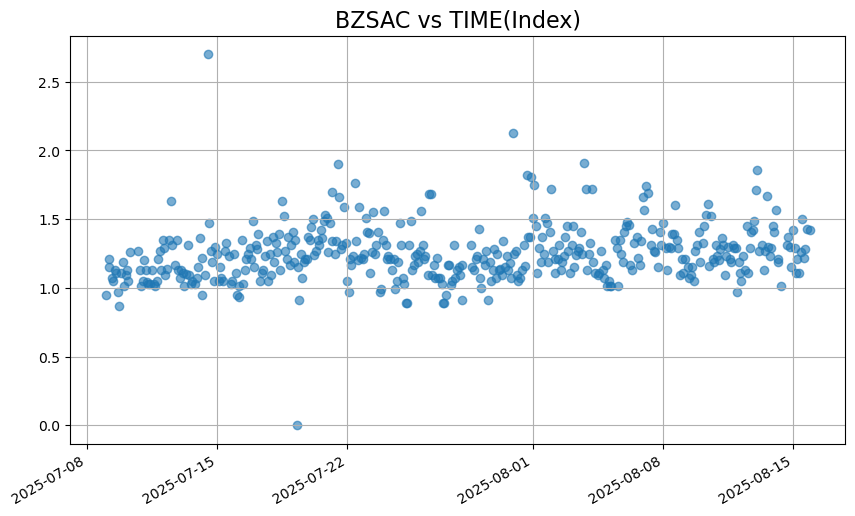

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(df_resample_1h.index, df_resample_1h["BZSAC"], alpha=0.6, label="BZSAC")
plt.title('BZSAC vs TIME(Index)', fontsize=16)
plt.grid(True)


# Rota las etiquetas del eje X para evitar la superposición
plt.gcf().autofmt_xdate()
plt.show()

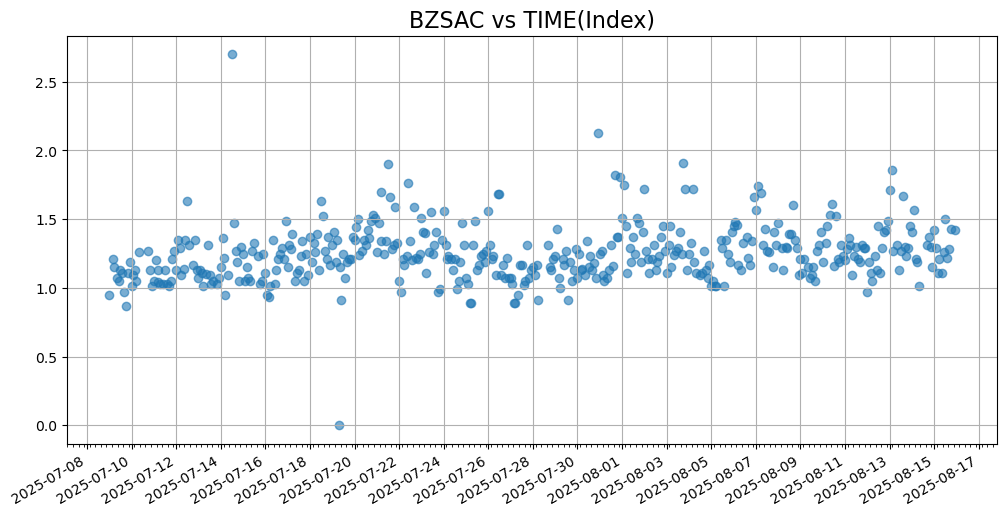

In [26]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(12, 6))
plt.scatter(df_resample_1h.index, df_resample_1h["BZSAC"], alpha=0.6, label="BZSAC")
plt.title('BZSAC vs TIME(Index)', fontsize=16)
plt.grid(True)

# --- Código para formatear el eje X ---

# Divisiones principales (cada día) con formato de fecha
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Divisiones secundarias (cada 6 horas) sin etiqueta
plt.gca().xaxis.set_minor_locator(mdates.HourLocator(interval=6))

# Rota las etiquetas del eje X para evitar la superposición
plt.gcf().autofmt_xdate()

plt.show()

Text(0, 0.5, 'Frecuencia')

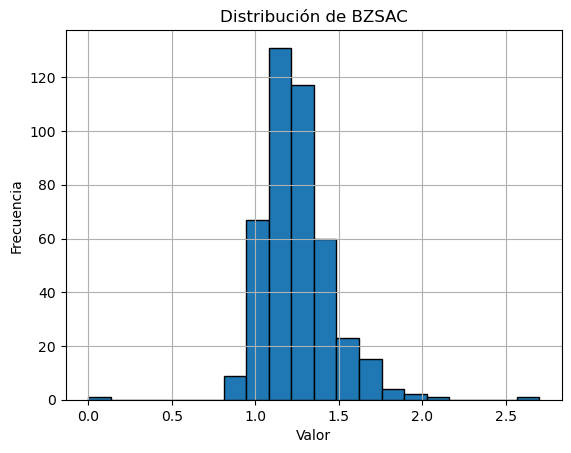

In [27]:
# Crear el histograma para la columna específica
df_resample_1h['BZSAC'].hist(bins=20, edgecolor='black')

# Añadir etiquetas y título para mayor claridad
plt.title('Distribución de BZSAC')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

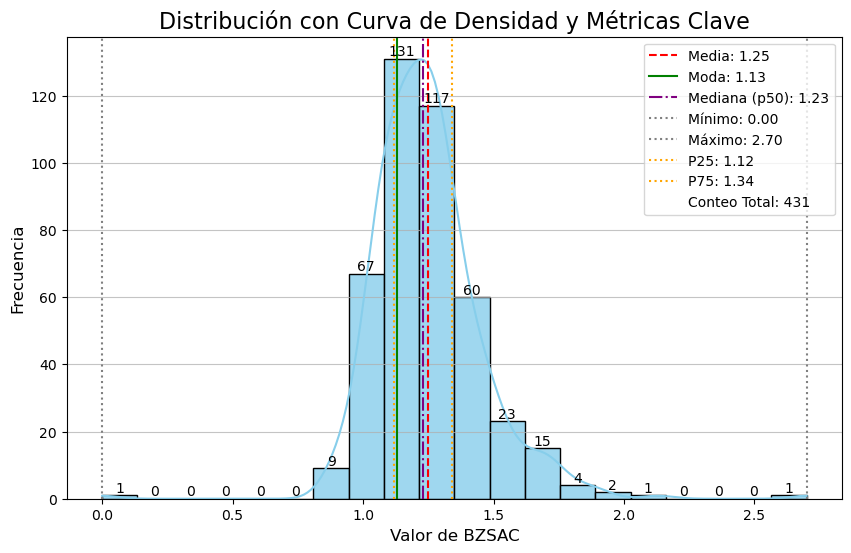

Conteo Total de Valores para df_resample_1h['BZSAC']: 431


In [13]:
import seaborn as sns
import numpy as np


# Crear el gráfico
plt.figure(figsize=(10, 6))

bzsac_clean1 = pd.to_numeric(df_resample_1h['BZSAC'], errors='coerce')

# Histograma con una curva de densidad superpuesta
# La curva de densidad es la línea curva que solicitas
ax = sns.histplot(bzsac_clean1, kde=True, bins=20, color='skyblue', edgecolor='black', alpha=0.8)

# Añadir la cantidad de valores (frecuencia) sobre cada barra
for container in ax.containers:
    plt.bar_label(container)

# Calcular las métricas
media = bzsac_clean1.mean()
moda = bzsac_clean1.mode()[0]
minimo = bzsac_clean1.min()
maximo = bzsac_clean1.max()
p_25 = bzsac_clean1.quantile(0.25)
p_50 = bzsac_clean1.quantile(0.50) # Mediana
p_75 = bzsac_clean1.quantile(0.75)
conteo_total = bzsac_clean1.count()  # Cálculo del conteo total

# Añadir líneas verticales al gráfico para las métricas
plt.axvline(media, color='red', linestyle='--', label=f'Media: {media:.2f}')
plt.axvline(moda, color='green', linestyle='-', label=f'Moda: {moda:.2f}')
plt.axvline(p_50, color='purple', linestyle='-.', label=f'Mediana (p50): {p_50:.2f}')
plt.axvline(minimo, color='gray', linestyle=':', label=f'Mínimo: {minimo:.2f}')
plt.axvline(maximo, color='gray', linestyle=':', label=f'Máximo: {maximo:.2f}')
plt.axvline(p_25, color='orange', linestyle=':', label=f'P25: {p_25:.2f}')
plt.axvline(p_75, color='orange', linestyle=':', label=f'P75: {p_75:.2f}')

# Añadir una línea transparente para incluir el conteo total en la leyenda
plt.axvline(np.nan, color='white', linestyle='-', label=f'Conteo Total: {conteo_total}')


# Personalizar el gráfico
plt.title('Distribución con Curva de Densidad y Métricas Clave', fontsize=16)
plt.xlabel('Valor de BZSAC', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend()
plt.grid(axis='y', alpha=0.75)

plt.show()

print(f"Conteo Total de Valores para df_resample_1h['BZSAC']: {bzsac_clean1.count()}")

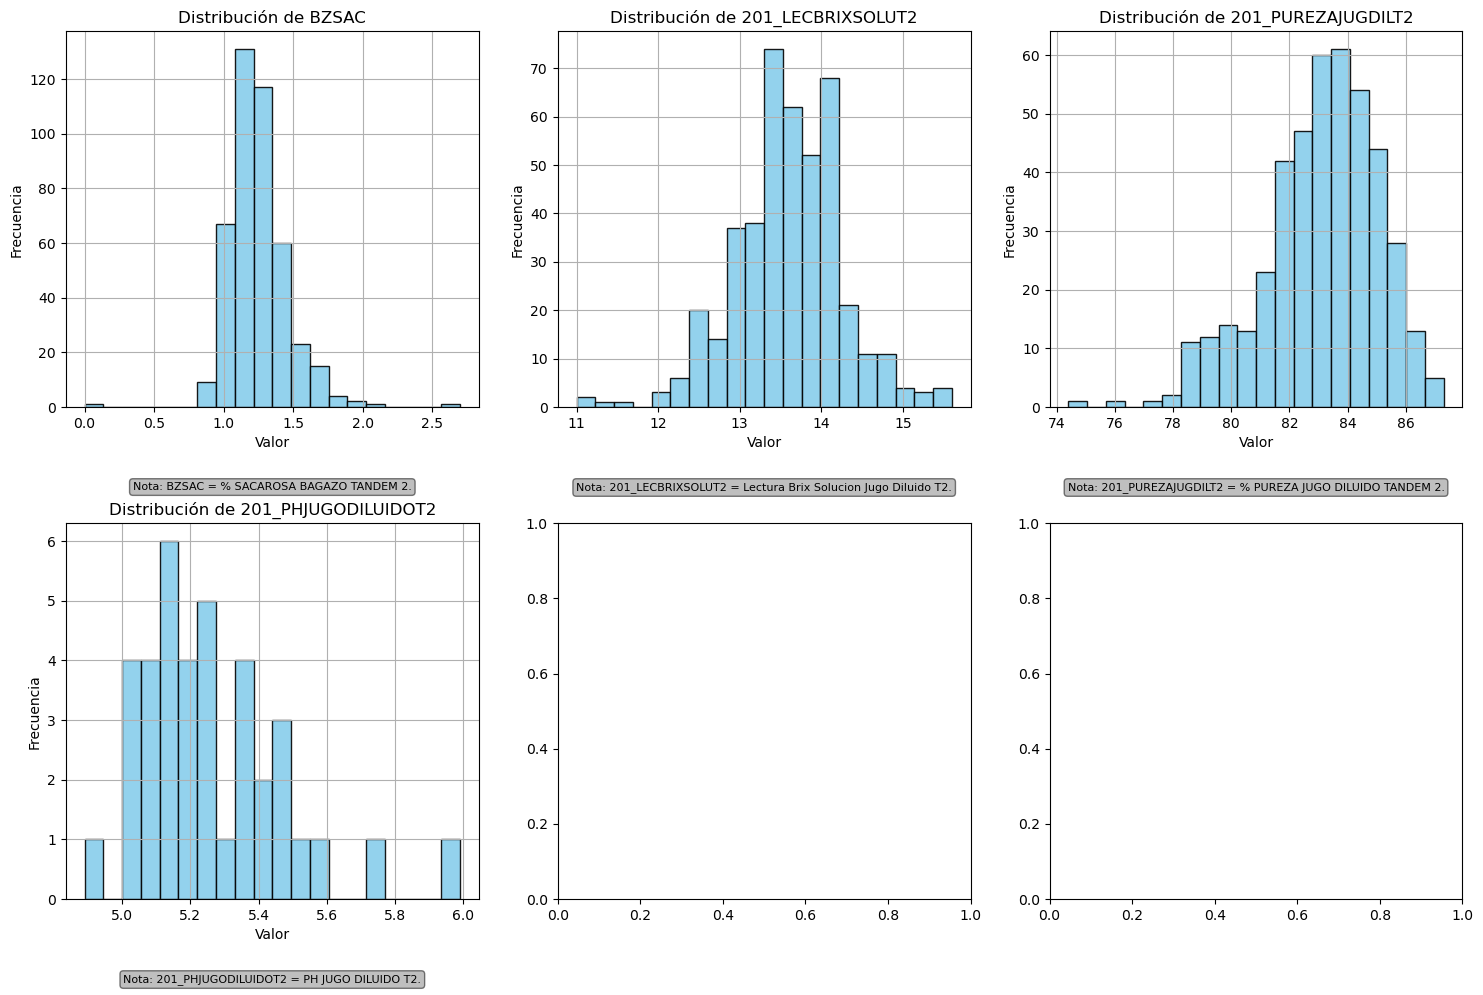

In [29]:

# Crear subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))


# Gráfico para crear el histograma para la columna específica
axes[0,0].hist(df_resample_1h['BZSAC'], bins=20, color='skyblue', edgecolor='black', alpha=0.9)
axes[0,0].grid(True)
# Añadir etiquetas y título para mayor claridad
axes[0,0].set_title("Distribución de BZSAC")
axes[0,0].set_xlabel("Valor")
axes[0,0].set_ylabel("Frecuencia")

# Añadir una nota debajo del gráfico
axes[0,0].text(x=0.5, y=-0.2, s="Nota: BZSAC = % SACAROSA BAGAZO TANDEM 2.",
             transform=axes[0,0].transAxes,
             fontsize=8,
             ha='center', # Alineación horizontal centrada
             va='top',    # Alineación vertical a la parte superior
             bbox=dict(boxstyle='round,pad=0.3', fc='gray', alpha=0.5))


# Gráfico para crear el histograma para la columna específica
axes[0,1].hist(df_resample_1h['201_LECBRIXSOLUT2'], bins=20, color='skyblue', edgecolor='black', alpha=0.9)
axes[0,1].grid(True)
# Añadir etiquetas y título para mayor claridad
axes[0,1].set_title("Distribución de 201_LECBRIXSOLUT2")
axes[0,1].set_xlabel("Valor")
axes[0,1].set_ylabel("Frecuencia")

# Añadir una nota debajo del gráfico
axes[0,1].text(x=0.5, y=-0.2, s="Nota: 201_LECBRIXSOLUT2 = Lectura Brix Solucion Jugo Diluido T2.",
             transform=axes[0,1].transAxes,
             fontsize=8,
             ha='center', # Alineación horizontal centrada
             va='top',    # Alineación vertical a la parte superior
             bbox=dict(boxstyle='round,pad=0.3', fc='gray', alpha=0.5))


# Gráfico para crear el histograma para la columna específica
axes[0,2].hist(df_resample_1h['201_PUREZAJUGDILT2'], bins=20, color='skyblue', edgecolor='black', alpha=0.9)
axes[0,2].grid(True)
# Añadir etiquetas y título para mayor claridad
axes[0,2].set_title("Distribución de 201_PUREZAJUGDILT2")
axes[0,2].set_xlabel("Valor")
axes[0,2].set_ylabel("Frecuencia")


# Añadir una nota debajo del gráfico
axes[0,2].text(x=0.5, y=-0.2, s="Nota: 201_PUREZAJUGDILT2 = % PUREZA JUGO DILUIDO TANDEM 2.",
             transform=axes[0,2].transAxes,
             fontsize=8,
             ha='center', # Alineación horizontal centrada
             va='top',    # Alineación vertical a la parte superior
             bbox=dict(boxstyle='round,pad=0.3', fc='gray', alpha=0.5))


# Gráfico para crear el histograma para la columna específica
axes[1,0].hist(df_resample_1h['201_PHJUGODILUIDOT2'], bins=20, color='skyblue', edgecolor='black', alpha=0.9)
axes[1,0].grid(True)
# Añadir etiquetas y título para mayor claridad
axes[1,0].set_title("Distribución de 201_PHJUGODILUIDOT2")
axes[1,0].set_xlabel("Valor")
axes[1,0].set_ylabel("Frecuencia")


# Añadir una nota debajo del gráfico
axes[1,0].text(x=0.5, y=-0.2, s="Nota: 201_PHJUGODILUIDOT2 = PH JUGO DILUIDO T2.",
             transform=axes[1,0].transAxes,
             fontsize=8,
             ha='center', # Alineación horizontal centrada
             va='top',    # Alineación vertical a la parte superior
             bbox=dict(boxstyle='round,pad=0.3', fc='gray', alpha=0.5))


plt.tight_layout()
plt.show()

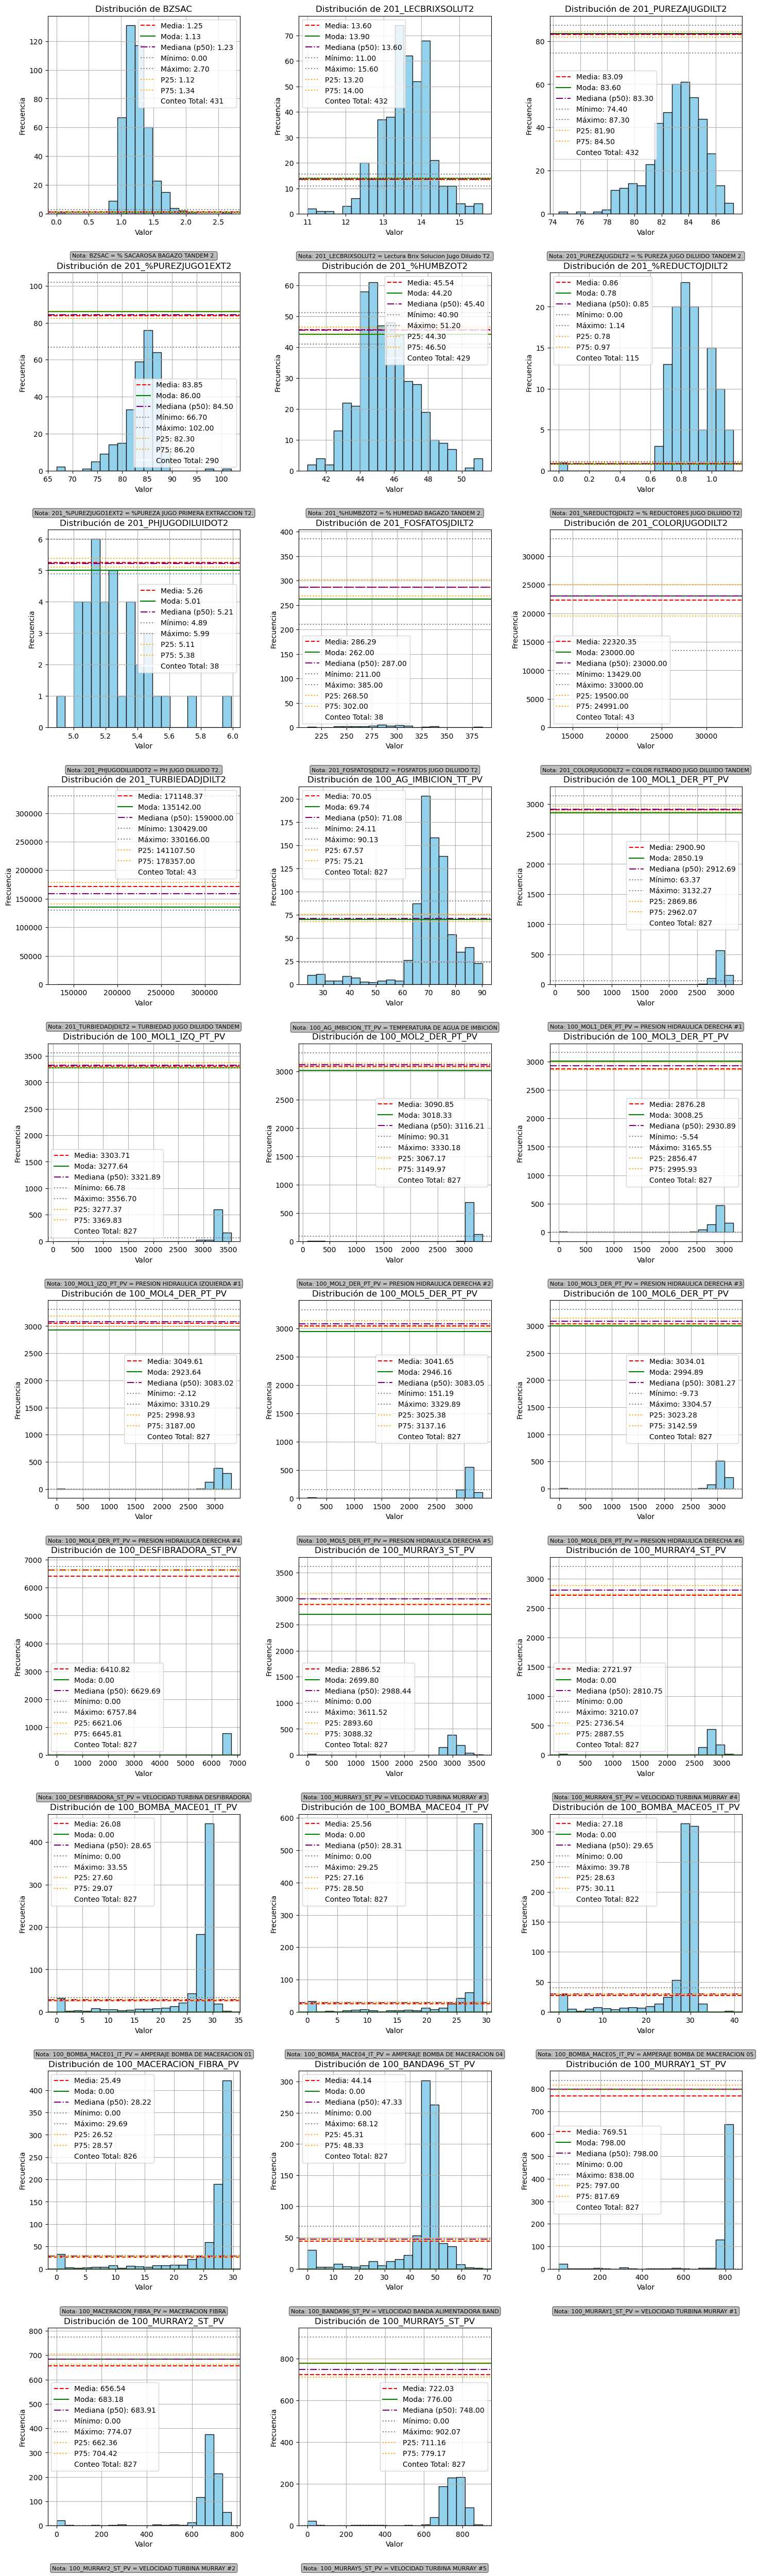

In [30]:
import matplotlib.pyplot as plt

# Diccionario con los nombres de las columnas que quieres graficar y sus descripciones
# Asegúrate de que estos nombres de columna existan en tu DataFrame
columnas_dict = {
    'BZSAC': '% SACAROSA BAGAZO TANDEM 2.',
    '201_LECBRIXSOLUT2': 'Lectura Brix Solucion Jugo Diluido T2.',
    '201_PUREZAJUGDILT2': '% PUREZA JUGO DILUIDO TANDEM 2.',
    # Añade aquí tus otras columnas de la segunda fila
    '201_%PUREZJUGO1EXT2': '%PUREZA JUGO PRIMERA EXTRACCION T2.',
    '201_%HUMBZOT2': '% HUMEDAD BAGAZO TANDEM 2.',
    '201_%REDUCTOJDILT2': '% REDUCTORES JUGO DILUIDO T2',
    '201_PHJUGODILUIDOT2': 'PH JUGO DILUIDO T2.',
    '201_FOSFATOSJDILT2': 'FOSFATOS JUGO DILUIDO T2',
    '201_COLORJUGODILT2': 'COLOR FILTRADO JUGO DILUIDO TANDEM',
    '201_TURBIEDADJDILT2': 'TURBIEDAD JUGO DILUIDO TANDEM',
    '100_AG_IMBICION_TT_PV': 'TEMPERATURA DE AGUA DE IMBICIÓN',
    '100_MOL1_DER_PT_PV': 'PRESION HIDRAULICA DERECHA #1',
    '100_MOL1_IZQ_PT_PV': 'PRESION HIDRAULICA IZQUIERDA #1',
    '100_MOL2_DER_PT_PV': 'PRESION HIDRAULICA DERECHA #2',
    '100_MOL3_DER_PT_PV': 'PRESION HIDRAULICA DERECHA #3',
    '100_MOL4_DER_PT_PV': 'PRESION HIDRAULICA DERECHA #4',
    '100_MOL5_DER_PT_PV': 'PRESION HIDRAULICA DERECHA #5',
    '100_MOL6_DER_PT_PV': 'PRESION HIDRAULICA DERECHA #6',
    '100_DESFIBRADORA_ST_PV': 'VELOCIDAD TURBINA DESFIBRADORA',
    '100_MURRAY3_ST_PV': 'VELOCIDAD TURBINA MURRAY #3',
    '100_MURRAY4_ST_PV': 'VELOCIDAD TURBINA MURRAY #4',
    '100_BOMBA_MACE01_IT_PV': 'AMPERAJE BOMBA DE MACERACION 01',
    '100_BOMBA_MACE04_IT_PV': 'AMPERAJE BOMBA DE MACERACION 04',
    '100_BOMBA_MACE05_IT_PV': 'AMPERAJE BOMBA DE MACERACION 05',
    '100_MACERACION_FIBRA_PV': 'MACERACION FIBRA',
    '100_BANDA96_ST_PV': 'VELOCIDAD BANDA ALIMENTADORA BAND',
    '100_MURRAY1_ST_PV': 'VELOCIDAD TURBINA MURRAY #1',
    '100_MURRAY2_ST_PV': 'VELOCIDAD TURBINA MURRAY #2',
    '100_MURRAY5_ST_PV': 'VELOCIDAD TURBINA MURRAY #5'
}

# La lista de columnas se crea automáticamente a partir del diccionario
columnas_a_graficar = list(columnas_dict.keys())
num_columnas = 3
num_filas = (len(columnas_a_graficar) + num_columnas - 1) // num_columnas

# Crear subplots de forma dinámica
fig, axes = plt.subplots(num_filas, num_columnas, figsize=(15, 5 * num_filas))

# Aplanar el array de ejes para iterar fácilmente
axes = axes.flatten()

# Iterar sobre las columnas para crear cada gráfico
for i, (col, desc) in enumerate(columnas_dict.items()):
    # Crear el histograma
    axes[i].hist(df_resample_1h[col].dropna(), bins=20, color='skyblue', edgecolor='black', alpha=0.9)
    axes[i].grid(True)
    
    # Calcular las métricas
    media = df_resample_1h[col].mean()
    moda = df_resample_1h[col].mode().iloc[0] if not df_resample_1h[col].mode().empty else np.nan
    minimo = df_resample_1h[col].min()  
    maximo = df_resample_1h[col].max()
    p_25 = df_resample_1h[col].quantile(0.25)
    p_50 = df_resample_1h[col].quantile(0.50)
    p_75 = df_resample_1h[col].quantile(0.75)
    conteo_total = df_resample_1h[col].count()  # Cálculo del conteo total

    # Añadir etiquetas y título
    axes[i].set_title(f"Distribución de {col}")
    axes[i].set_xlabel("Valor")
    axes[i].set_ylabel("Frecuencia")

    # Añadir líneas verticales para las métricas
    axes[i].axhline(media, color='red', linestyle='--', label=f'Media: {media:.2f}')
    axes[i].axhline(moda, color='green', linestyle='-', label=f'Moda: {moda:.2f}')
    axes[i].axhline(p_50, color='purple', linestyle='-.', label=f'Mediana (p50): {p_50:.2f}')

    # Mostrar las métricas de máximo, mínimo y percentiles en la leyenda
    axes[i].axhline(minimo, color='gray', linestyle=':', label=f'Mínimo: {minimo:.2f}')
    axes[i].axhline(maximo, color='gray', linestyle=':', label=f'Máximo: {maximo:.2f}')
    axes[i].axhline(p_25, color='orange', linestyle=':', label=f'P25: {p_25:.2f}')
    axes[i].axhline(p_75, color='orange', linestyle=':', label=f'P75: {p_75:.2f}')

    # Añadir una línea transparente para incluir el conteo total en la leyenda
    axes[i].axhline(np.nan, color='white', linestyle='-', label=f'Conteo Total: {conteo_total}')

    axes[i].legend()

    # Añadir la nota centrada
    axes[i].text(x=0.5, y=-0.2, s=f"Nota: {col} = {desc}",
                 transform=axes[i].transAxes,
                 fontsize=8,
                 ha='center',
                 va='top',
                 bbox=dict(boxstyle='round,pad=0.3', fc='gray', alpha=0.5))

# Eliminar los subplots vacíos que no se usaron
for j in range(len(columnas_a_graficar), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
!pip install seaborn

In [32]:
import seaborn as sns

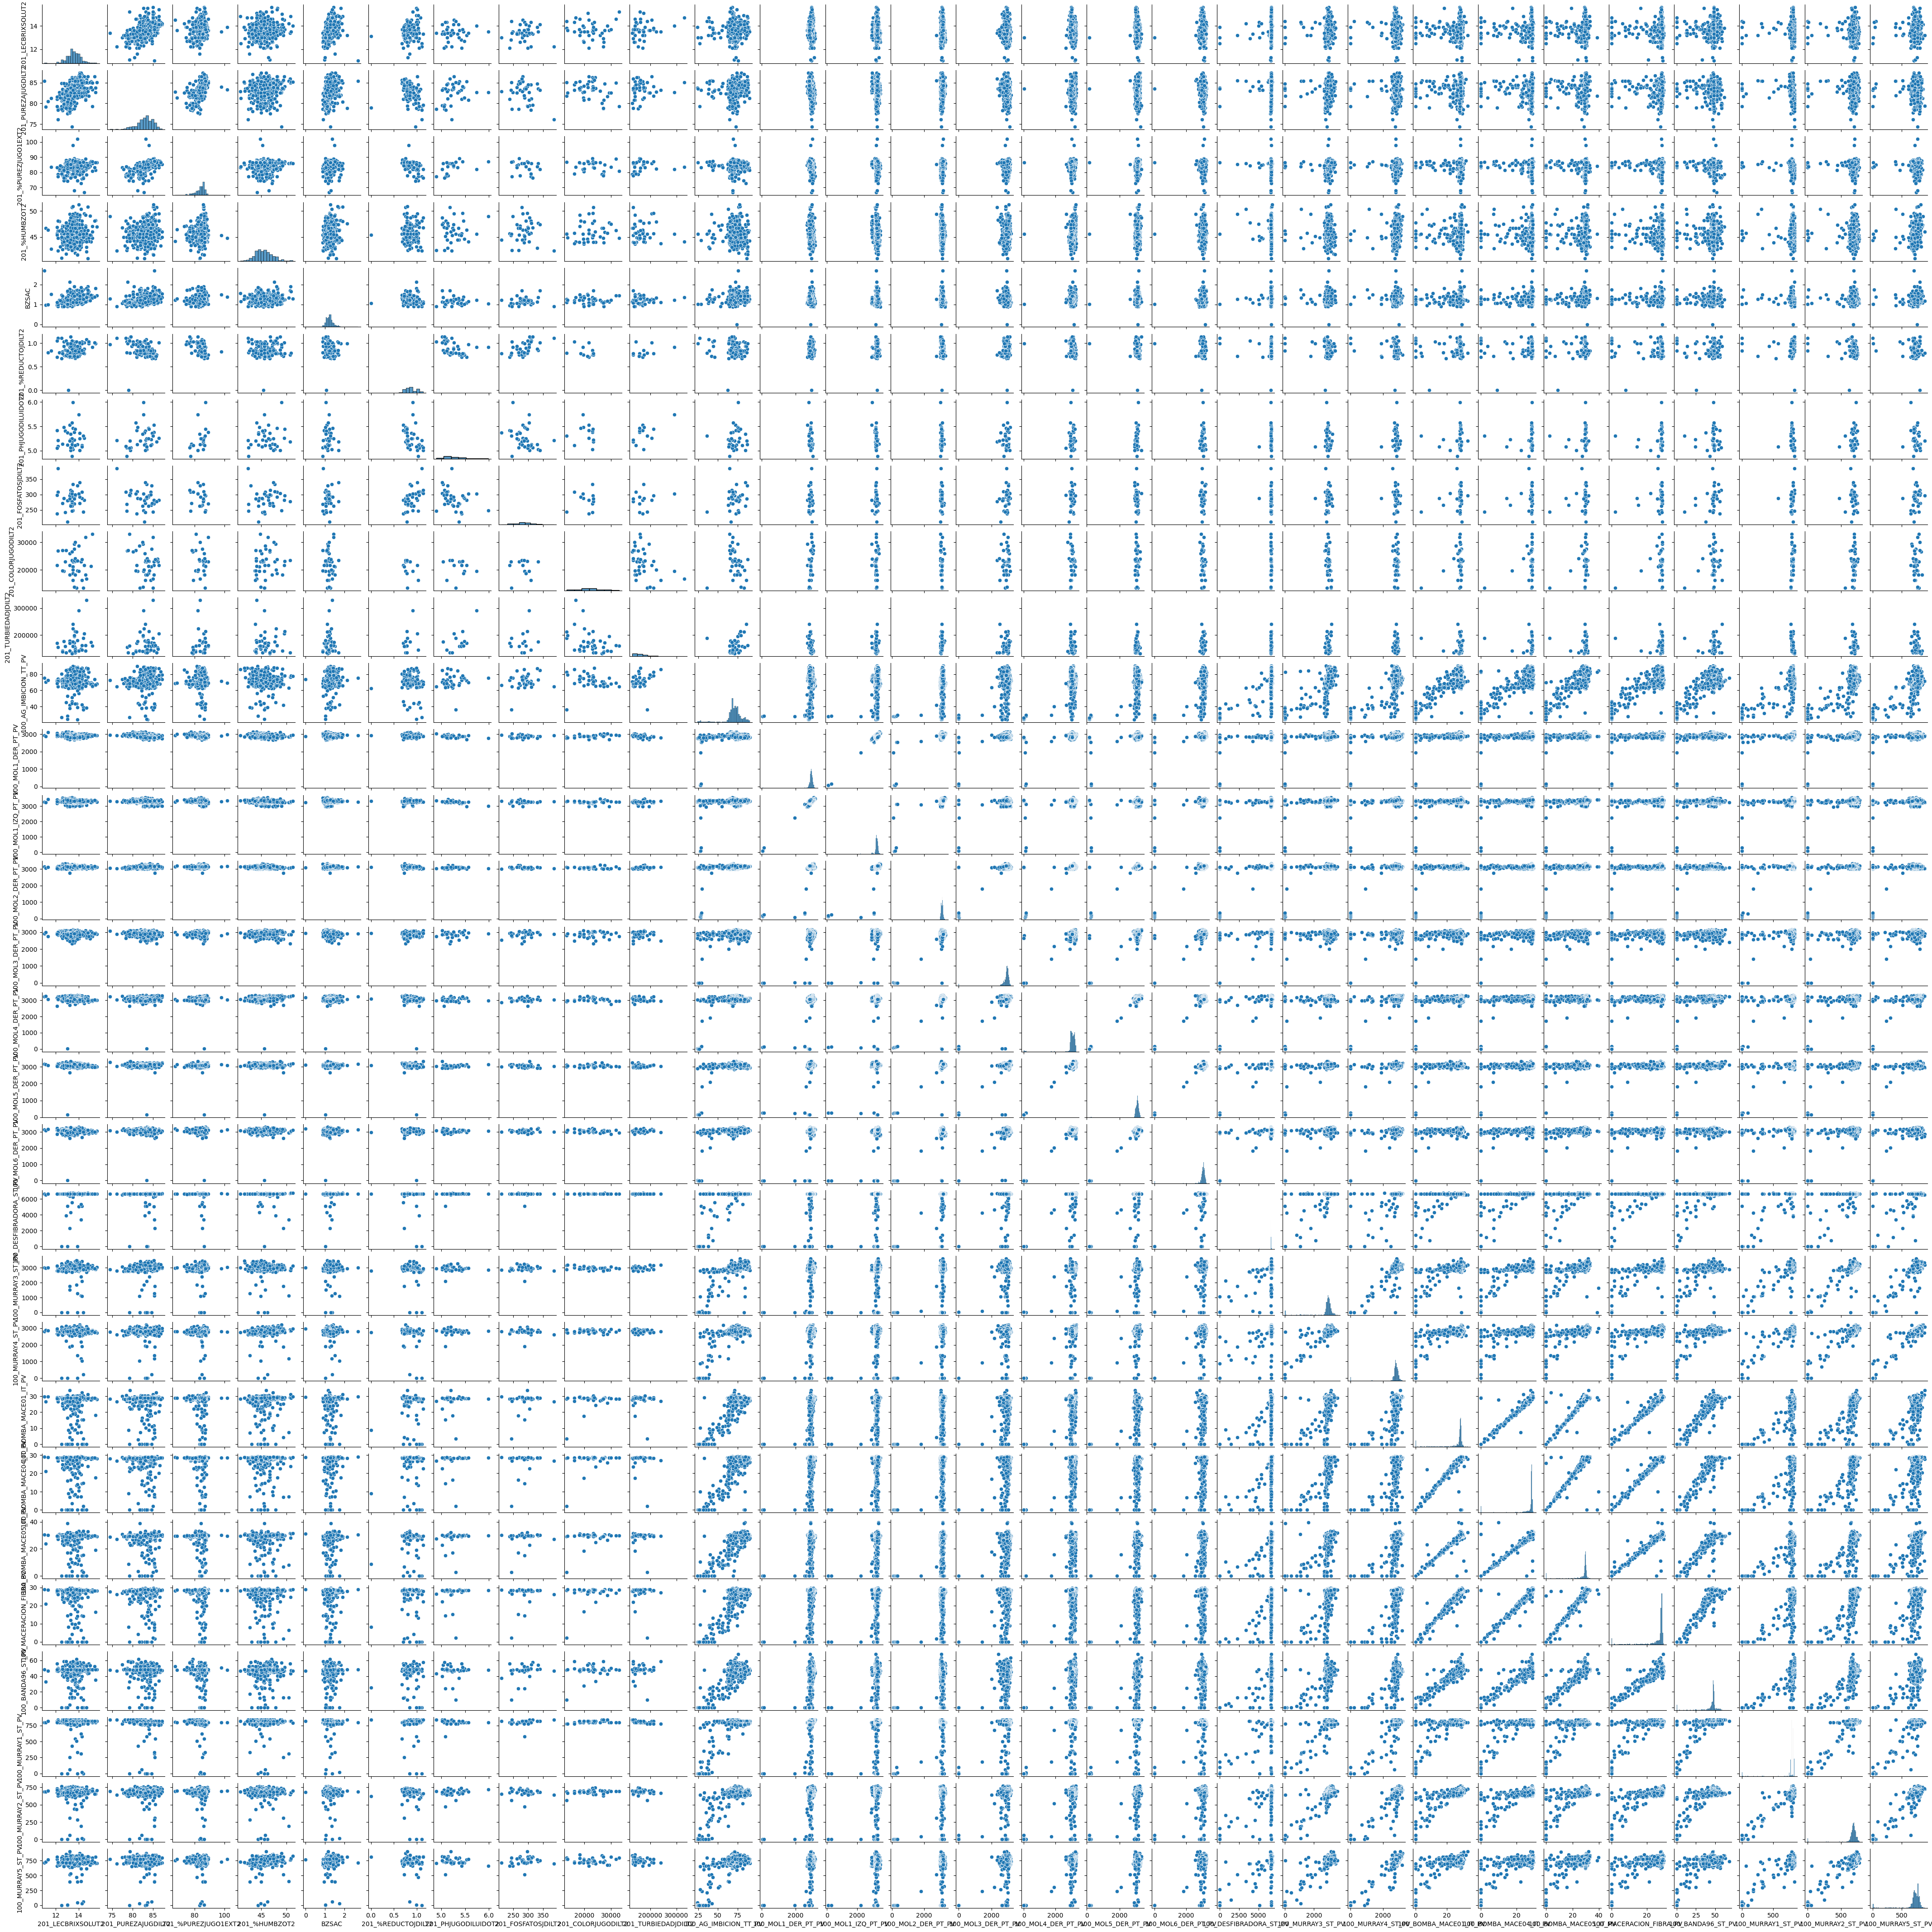

In [33]:
sns.pairplot(df_resample_1h, height=1.5)

In [14]:
# Asegurar numérico
bzsac = pd.to_numeric(df_resample_1h["BZSAC"], errors="coerce")

# Remover NaN y ceros
bzsac_clean = bzsac.dropna()
bzsac_clean = bzsac_clean[bzsac_clean != 0]

bzsac_clean.describe()


count    430.000000
mean       1.252767
std        0.201176
min        0.870000
25%        1.130000
50%        1.230000
75%        1.340000
max        2.700000
Name: BZSAC, dtype: float64

In [16]:
bzsac_clean

Time
2025-07-09 00:00:00    0.95
2025-07-09 04:00:00    1.21
2025-07-09 05:00:00    1.15
2025-07-09 08:00:00    1.07
2025-07-09 10:00:00    1.05
                       ... 
2025-08-15 12:00:00    1.50
2025-08-15 14:00:00    1.22
2025-08-15 16:00:00    1.28
2025-08-15 18:00:00    1.43
2025-08-15 22:00:00    1.42
Name: BZSAC, Length: 430, dtype: float64

In [36]:
bzsac_clean.isna().sum()


np.int64(0)

In [37]:
bzsac_clean.isnull().sum()

np.int64(0)

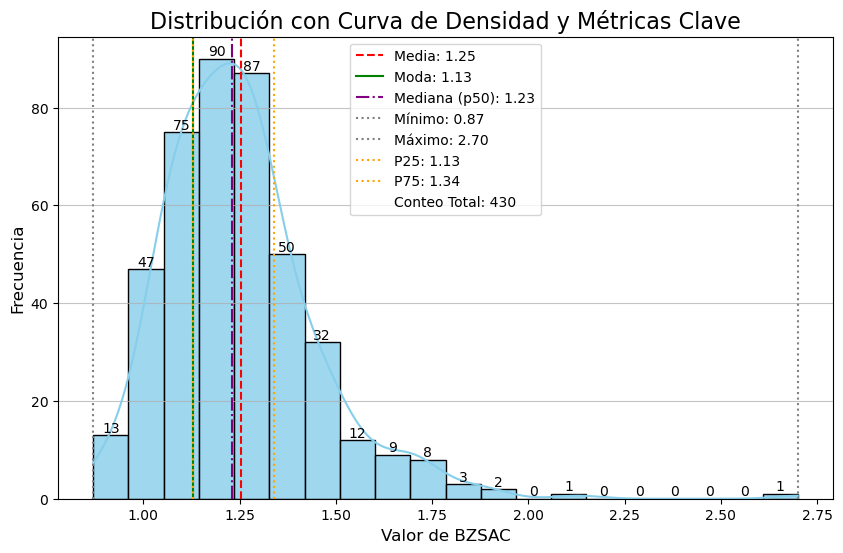

In [38]:

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Histograma con una curva de densidad superpuesta
# La curva de densidad es la línea curva que solicitas
ax = sns.histplot(bzsac_clean, kde=True, bins=20, color='skyblue', edgecolor='black', alpha=0.8)

# Añadir la cantidad de valores (frecuencia) sobre cada barra
for container in ax.containers:
    plt.bar_label(container)

# Calcular las métricas
media = bzsac_clean.mean()
moda = bzsac_clean.mode()[0]
minimo = bzsac_clean.min()
maximo = bzsac_clean.max()
p_25 = bzsac_clean.quantile(0.25)
p_50 = bzsac_clean.quantile(0.50) # Mediana
p_75 = bzsac_clean.quantile(0.75)
conteo_total = bzsac_clean.count()  # Cálculo del conteo total

# Añadir líneas verticales al gráfico para las métricas
plt.axvline(media, color='red', linestyle='--', label=f'Media: {media:.2f}')
plt.axvline(moda, color='green', linestyle='-', label=f'Moda: {moda:.2f}')
plt.axvline(p_50, color='purple', linestyle='-.', label=f'Mediana (p50): {p_50:.2f}')
plt.axvline(minimo, color='gray', linestyle=':', label=f'Mínimo: {minimo:.2f}')
plt.axvline(maximo, color='gray', linestyle=':', label=f'Máximo: {maximo:.2f}')
plt.axvline(p_25, color='orange', linestyle=':', label=f'P25: {p_25:.2f}')
plt.axvline(p_75, color='orange', linestyle=':', label=f'P75: {p_75:.2f}')

# Añadir una línea transparente para incluir el conteo total en la leyenda
plt.axvline(np.nan, color='white', linestyle='-', label=f'Conteo Total: {conteo_total}')


# Personalizar el gráfico
plt.title('Distribución con Curva de Densidad y Métricas Clave', fontsize=16)
plt.xlabel('Valor de BZSAC', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend()
plt.grid(axis='y', alpha=0.75)

plt.show()

In [39]:
# Calcular el sesgo sobre la serie de datos limpia
sesgo = bzsac_clean.skew()
print(f"El sesgo de la variable BZSAC es: {sesgo:.4f}")

# Calcular la curtosis sobre la serie de datos limpia
curtosis = bzsac_clean.kurt()

# Mostrar el resultado de la curtosis
print(f"La curtosis de la variable BZSAC es: {curtosis:.4f}")

El sesgo de la variable BZSAC es: 1.6376
La curtosis de la variable BZSAC es: 6.9043


### Análisis de la distribución

*Skewness (Sesgo), calcula el sesgo para determinar si la distribución está sesgada hacia la izquierda o la derecha. Un valor de 0 indica simetría perfecta.*

El **sesgo (Skewness) de 1.6376** indica que la distribución está **sesgada a la derecha**. Esto es visible en el gráfico, donde la mayor parte de los datos se concentran en el lado izquierdo (entre 1.00 y 1.25). La cola de valores altos es más larga, extendiéndose hacia la derecha con barras de frecuencia más bajas y espaciadas, lo que sugiere que hay valores más extremos en esa dirección.

---

La **curtosis (Kurtosis) de 6.9043** indica que la distribución es **leptocúrtica**. Esto significa que tiene un pico más alto y colas más pesadas, lo que en la práctica se traduce en una mayor presencia de **valores atípicos o extremos** en comparación con una distribución normal.

---

En resumen, los resultados numéricos confirman que la variable **BZSAC** no es simétrica y presenta valores extremos que afectan su forma. Estos valores atípicos deben ser analizados para determinar si representan errores de medición o son datos reales pero inusuales.

# Pregunta Fredy:

Los valores atipicos son datos reales, pero inusuales o representan errores en la medición?

### Detección de valores atípicos (outliers)

Los valores atípicos pueden distorsionar el análisis. Se usa un gráfico de caja (box plot) para visualizarlos y el método del Rango Intercuartílico (IQR) para detectarlos de forma cuantitativa.

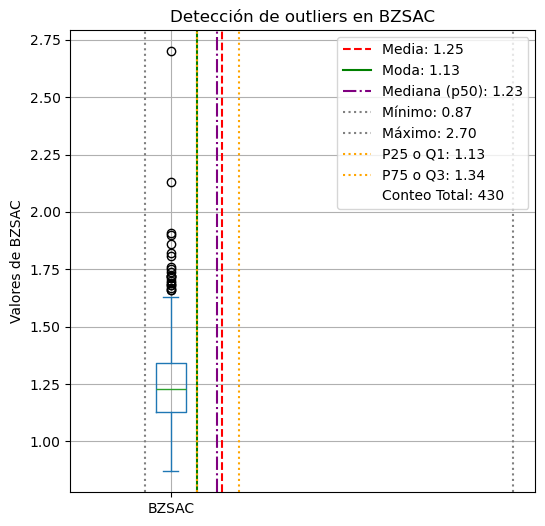

In [21]:
# Crear el gráfico de caja
bzsac_clean.plot(kind='box', figsize=(6, 6))

# Calcular las métricas
media = bzsac_clean.mean()
moda = bzsac_clean.mode()[0]
minimo = bzsac_clean.min()
maximo = bzsac_clean.max()
p_25 = bzsac_clean.quantile(0.25)
p_50 = bzsac_clean.quantile(0.50) # Mediana
p_75 = bzsac_clean.quantile(0.75)
conteo_total = bzsac_clean.count()  # Cálculo del conteo total

# Añadir líneas verticales al gráfico para las métricas
plt.axvline(media, color='red', linestyle='--', label=f'Media: {media:.2f}')
plt.axvline(moda, color='green', linestyle='-', label=f'Moda: {moda:.2f}')
plt.axvline(p_50, color='purple', linestyle='-.', label=f'Mediana (p50): {p_50:.2f}')
plt.axvline(minimo, color='gray', linestyle=':', label=f'Mínimo: {minimo:.2f}')
plt.axvline(maximo, color='gray', linestyle=':', label=f'Máximo: {maximo:.2f}')
plt.axvline(p_25, color='orange', linestyle=':', label=f'P25 o Q1: {p_25:.2f}')
plt.axvline(p_75, color='orange', linestyle=':', label=f'P75 o Q3: {p_75:.2f}')

# Añadir una línea transparente para incluir el conteo total en la leyenda
plt.axvline(np.nan, color='white', linestyle='-', label=f'Conteo Total: {conteo_total}')

plt.legend()

# Añadir título
plt.title('Detección de outliers en BZSAC')
plt.ylabel('Valores de BZSAC')
plt.grid(True)
plt.show()

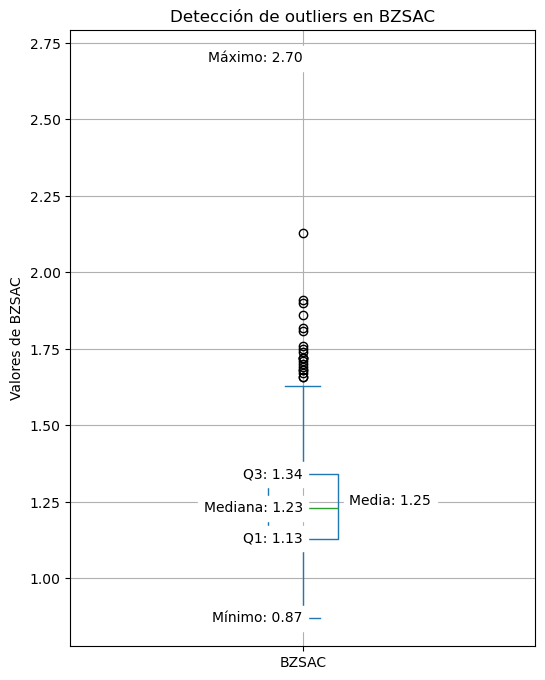

In [20]:

# Crear el gráfico de caja
plt.figure(figsize=(6, 8))
ax = bzsac_clean.plot(kind='box')

# Calcular las métricas
mediana = bzsac_clean.median()
media = bzsac_clean.mean()
q1 = bzsac_clean.quantile(0.25)
q3 = bzsac_clean.quantile(0.75)
minimo = bzsac_clean.min()
maximo = bzsac_clean.max()
moda = bzsac_clean.mode()[0]

# Agregar los valores de las métricas directamente en el gráfico
plt.text(1, mediana, f'Mediana: {mediana:.2f}', va='center', ha='right', backgroundcolor='white')
plt.text(1.1, media, f'Media: {media:.2f}', va='center', ha='left', backgroundcolor='white')
plt.text(1, q1, f'Q1: {q1:.2f}', va='center', ha='right', backgroundcolor='white')
plt.text(1, q3, f'Q3: {q3:.2f}', va='center', ha='right', backgroundcolor='white')
plt.text(1, minimo, f'Mínimo: {minimo:.2f}', va='center', ha='right', backgroundcolor='white')
plt.text(1, maximo, f'Máximo: {maximo:.2f}', va='center', ha='right', backgroundcolor='white')
#plt.text(1, moda, f'Moda: {moda:.2f}', va='center', ha='right', backgroundcolor='white')

# Añadir título y etiquetas
plt.title('Detección de outliers en BZSAC')
plt.ylabel('Valores de BZSAC')
plt.grid(True)
plt.show()

El gráfico de cajas y bigotes muestra claramente la presencia de numerosos valores atípicos en la variable BZSAC. Estos valores son aquellos que se encuentran significativamente alejados del cuerpo principal de los datos y se representan como puntos individuales fuera de los "bigotes" del gráfico.

La mayoría de los datos se concentran en la caja central, que abarca el 50% de las observaciones entre el Primer Cuartil (Q1) de 1.13 y el Tercer Cuartil (Q3) de 1.34. La mediana es 1.23, lo que indica que la mitad de los valores están por debajo de este punto.

Sin embargo, los valores atípicos, que se extienden desde aproximadamente 1.70 hasta 2.70, muestran una variabilidad considerable y son los que explican el sesgo positivo y la alta curtosis que se observó en el análisis anterior. También se observa un valor atípico en cero, que probablemente es un error de medición o un valor faltante.

La presencia de estos valores atípicos es crucial para el análisis. Debemos investigarlos para determinar si son:

* Errores de medición: Se deben eliminar o corregir.

* Valores reales pero inusuales: Representan eventos reales que podrían ser importantes para el negocio, como fallos en el equipo o cambios en el proceso. En este caso, se deben manejar cuidadosamente y no eliminarlos.

# Calcular los cuartiles y el rango intercuartilico

In [44]:
# Calcular los cuartiles Q1 y Q3
Q1 = bzsac_clean.quantile(0.25)
Q3 = bzsac_clean.quantile(0.75)

# Calcular el Rango Intercuartílico (IQR)
IQR = Q3 - Q1

# Definir los límites para detectar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Encontrar los valores atípicos
outliers = bzsac_clean[(bzsac_clean < limite_inferior) | (bzsac_clean > limite_superior)]

# Mostrar los resultados
print("--- Método del Rango Intercuartílico (IQR) ---")
print(f"Cuartil 1 (Q1): {Q1:.2f}")
print(f"Cuartil 3 (Q3): {Q3:.2f}")
print(f"Rango Intercuartílico (IQR): {IQR:.2f}")
print(f"Límite Inferior: {limite_inferior:.2f}")
print(f"Límite Superior: {limite_superior:.2f}")
print(f"\nNúmero de valores atípicos detectados: {len(outliers)}")
print("\nValores atípicos:")
print(outliers)

--- Método del Rango Intercuartílico (IQR) ---
Cuartil 1 (Q1): 1.13
Cuartil 3 (Q3): 1.34
Rango Intercuartílico (IQR): 0.21
Límite Inferior: 0.81
Límite Superior: 1.66

Número de valores atípicos detectados: 21

Valores atípicos:
Time
2025-07-14 12:00:00    2.70
2025-07-21 05:00:00    1.70
2025-07-21 12:00:00    1.90
2025-07-21 14:00:00    1.66
2025-07-22 10:00:00    1.76
2025-07-26 10:00:00    1.68
2025-07-26 12:00:00    1.68
2025-07-30 22:00:00    2.13
2025-07-31 16:00:00    1.82
2025-07-31 22:00:00    1.81
2025-08-01 02:00:00    1.75
2025-08-02 00:00:00    1.72
2025-08-03 18:00:00    1.91
2025-08-03 20:00:00    1.72
2025-08-04 04:00:00    1.72
2025-08-06 22:00:00    1.66
2025-08-07 02:00:00    1.74
2025-08-07 05:00:00    1.69
2025-08-13 00:00:00    1.71
2025-08-13 02:00:00    1.86
2025-08-13 14:00:00    1.67
Name: BZSAC, dtype: float64


**Interpretación del Método IQR**

*Cuartiles y Rango Intercuartílico (IQR):*

* Cuartil 1 (Q1): 1.13: El 25% de los valores de BZSAC son iguales o menores a 1.13.

* Cuartil 3 (Q3): 1.34: El 75% de los valores de BZSAC son iguales o menores a 1.34.

* Rango Intercuartílico (IQR): 0.21: Esta es la diferencia entre Q3 y Q1. Representa el 50% central de tus datos y muestra la dispersión en esa sección.

*Límites para la Detección de Atípicos:*

* Límite Inferior: 0.81: Cualquier valor por debajo de 0.81 es considerado un valor atípico.

* Límite Superior: 1.66: Cualquier valor por encima de 1.66 es considerado un valor atípico.

*Resultados de la Detección:*

* Número de outliers detectados: 21: Se encontraron 21 valores que caen fuera del rango definido por los límites.

* Valores atípicos: La lista que sigue muestra la fecha y el valor exacto de cada uno de los 21 outliers. Por ejemplo, el 14 de julio de 2025 a las 12:00, se registró un valor de 2.70, que está muy por encima del límite superior de 1.66.

*Resumen y Siguientes Pasos*

La presencia de 21 valores atípicos, como lo indica el análisis numérico, es consistente con el sesgo y la curtosis que se encontró anteriormente. El valor más alto de la serie es 2.70, lo que confirma que hay valores extremos que están alejados del grupo principal de datos.

El siguiente paso del análisis se debe decidir cómo manejar estos valores. Las opciones incluyen:

- Eliminarlos: Si son errores de medición o de entrada de datos.

- Imputarlos o transformarlos: Si son valores reales que podrían afectar el rendimiento de tu modelo.

- Mantenerlos: Si son eventos importantes que no deben ser ignorados.

# Pruebas de normalidad

Es importante saber si la variable BZSAC sigue una distribución normal, ya que muchos modelos estadísticos lo asumen.

**Q-Q Plot**

Un Q-Q plot (Gráfico Cuantil-Cuantil) es una forma visual de verificar la normalidad. Si los puntos se alinean a lo largo de la línea diagonal, la distribución es normal.

**Prueba de Shapiro-Wilk**

Esta es una prueba estadística que evalúa la hipótesis nula de que los datos provienen de una población distribuida normalmente.

Si el valor p es mayor a 0.05: No tienes suficiente evidencia para rechazar la hipótesis nula. Esto sugiere que tus datos podrían seguir una distribución normal.

Si el valor p es menor o igual a 0.05: Rechazas la hipótesis nula. Esto indica que es muy probable que tus datos no sigan una distribución normal.

In [ ]:
!pip install statsmodels

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\graphics\gofplots.py:1041: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


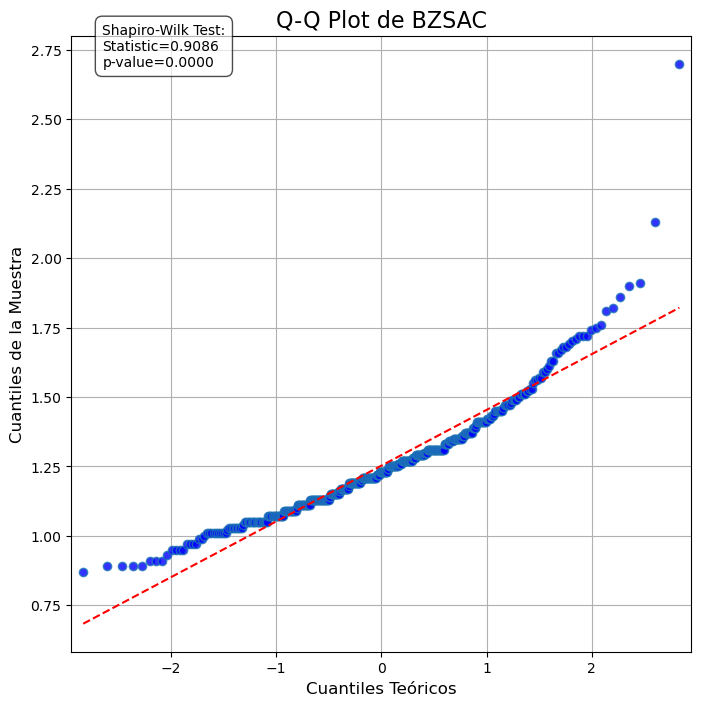

In [46]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import shapiro


# Crear el Q-Q Plot
fig, ax = plt.subplots(figsize=(8, 8))
sm.qqplot(bzsac_clean, line='s', ax=ax, color='skyblue', alpha=0.8)

# Personalizar la línea de referencia
ax.get_lines()[0].set_markerfacecolor('blue')
ax.get_lines()[1].set_color('red')
ax.get_lines()[1].set_linestyle('--')

# Realizar la prueba de Shapiro-Wilk
stat, p_value = shapiro(bzsac_clean)

# Añadir la estadística de la prueba y el valor p como texto en el gráfico
plt.text(x=0.05, y=0.95, s=f'Shapiro-Wilk Test:\nStatistic={stat:.4f}\np-value={p_value:.4f}',
         transform=ax.transAxes,
         fontsize=10,
         bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.7))

# Añadir título y etiquetas
plt.title('Q-Q Plot de BZSAC', fontsize=16)
plt.xlabel('Cuantiles Teóricos', fontsize=12)
plt.ylabel('Cuantiles de la Muestra', fontsize=12)
plt.grid(True)

plt.show()


El gráfico es un diagrama de dispersión (Scatter Plot) de la variable BZSAC frente al tiempo. Te permite ver cómo la variable se comporta a lo largo del tiempo, y si hay patrones o variaciones.

**Interpretación del Gráfico**

* Estabilidad a lo largo del tiempo: En general, la mayoría de los puntos de datos se agrupan en un rango estrecho, principalmente entre 1.0 y 1.5. Esto sugiere que, a lo largo del período observado, la variable BZSAC se mantiene relativamente estable y consistente, sin grandes fluctuaciones constantes.

* Presencia de valores atípicos: Se puede observar claramente la presencia de varios puntos que se alejan significativamente de la banda principal de datos. Estos puntos representan los valores atípicos que ya se identificaron en el análisis univariado. Los puntos más notables están en un valor cercano a cero y otros por encima de 2.0.

**Resumen**

El gráfico confirma que la variable BZSAC es relativamente estable a lo largo del tiempo. Sin embargo, la presencia de puntos atípicos, especialmente el valor cercano a cero, es un punto crítico que dse debe investigar. Esto podría ser un error de medición o un valor de sensor defectuoso, por lo que es importante decidir si se debe eliminar del conjunto de datos para un análisis más limpio.


**Interpretación de la Prueba de Normalidad de Shapiro-Wilk**

Los resultados de tu prueba de Shapiro-Wilk son:

- Estadística de prueba: 0.9086

- Valor p: 0.0000

El valor p es la métrica más importante en este caso. El valor de 0.0000 es significativamente menor que el umbral común de 0.05.

Esto significa que tienes evidencia estadística sólida para rechazar la hipótesis nula de que tus datos provienen de una distribución normal. En otras palabras, la prueba de Shapiro-Wilk confirma lo que ya observaste en el Q-Q Plot: la distribución de tu variable BZSAC no es normal.

Este hallazgo es crucial para los siguientes pasos de tu análisis. Si planeas usar modelos o pruebas estadísticas que asumen una distribución normal, deberás considerar la transformación de tus datos o el uso de métodos no paramétricos que no requieren esta suposición.

In [19]:
bzsac_clean.head()

Time
2025-07-09 00:00:00    0.95
2025-07-09 04:00:00    1.21
2025-07-09 05:00:00    1.15
2025-07-09 08:00:00    1.07
2025-07-09 10:00:00    1.05
Name: BZSAC, dtype: float64

In [ ]:


'''
esto es lo que hice arriba

# Asegurar numérico
bzsac = pd.to_numeric(df_resample_1h["BZSAC"], errors="coerce")

# Remover NaN y ceros
bzsac_clean = bzsac.dropna()
bzsac_clean = bzsac_clean[bzsac_clean != 0]

bzsac_clean.describe()

'''

df_resample_1h["Time"] = pd.to_datetime(df["Time"], errors="coerce")


# --- 3. Limpiar de nuevo BZSAC
df_resample_1h["BZSAC"] = pd.to_numeric(df["BZSAC"], errors="coerce")
df_clean = df_resample_1h.dropna(subset=["BZSAC"])
df_clean = df_clean[df_clean["BZSAC"] != 0]


# --- 4. Calcular media
mean_bzsac = df_clean["BZSAC"].mean()


# --- 4. Calcular las otras metricas

min_val = bzsac_clean.min()
p25, p50, p75 = bzsac_clean.quantile([0.25, 0.5, 0.75])
max_val = bzsac_clean.max()

Q1 = bzsac_clean.quantile(0.25)
Q3 = bzsac_clean.quantile(0.75)
IQR = Q3 - Q1
# Límites de los bigotes
lower = bzsac_clean[bzsac_clean >= (Q1 - 1.5*IQR)].min()
upper = bzsac_clean[bzsac_clean <= (Q3 + 1.5*IQR)].max()


# --- 5. Graficar
plt.figure(figsize=(12,5))
plt.plot(df_clean["Time"], df_clean["BZSAC"], linestyle="-", label="BZSAC")
plt.axhline(p50, color="green", linestyle="--", linewidth=2, label=f"Media = {p50:.2f}")
plt.axhline(p75, color="red", linestyle="--", linewidth=2, label=f"p75 = {p75:.2f}")
plt.axhline(p25, color="red", linestyle="--", linewidth=2, label=f"p25 = {p25:.2f}")
plt.axhline(lower, color="black", linestyle="--", linewidth=2, label=f"inf = {lower:.2f}")
plt.axhline(upper, color="black", linestyle="-.", linewidth=2, label=f"sup = {upper:.2f}")

plt.title("Evolución de BZSAC en el tiempo")
plt.xlabel("Tiempo")
plt.ylabel("BZSAC")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

TypeError: Invalid comparison between dtype=datetime64[ns] and float

# **Data Set Original de Fredy - Sin Ejecutar**

In [ ]:

df = pd.read_csv('DatosAreaMolinos.csv', sep=";")

In [61]:
df.head()

Time  201_LECBRIXSOLUT2  201_PUREZAJUGDILT2  \
0  01/02/2025 5:00                NaN                 NaN   
1  01/03/2025 2:00                NaN                 NaN   
2  01/03/2025 5:00                NaN                 NaN   
3  01/04/2025 2:00                NaN                 NaN   
4  01/04/2025 5:00                NaN                 NaN   

   201_%PUREZJUGO1EXT2  201_%HUMBZOT2  BZSAC  201_%REDUCTOJDILT2  \
0                  NaN            NaN    NaN                0.85   
1                  NaN            NaN    NaN                 NaN   
2                  NaN            NaN    NaN                0.66   
3                  NaN            NaN    NaN                 NaN   
4                  NaN            NaN    NaN                0.58   

   201_PHJUGODILUIDOT2  201_FOSFATOSJDILT2  201_COLORJUGODILT2  ...  \
0                 5.15               329.0                 NaN  ...   
1                 0.00                 NaN                 NaN  ...   
2                 5.28               400.0                 NaN  ...   
3                 0.00                 NaN                 NaN  ...   
4                 5.40               398.0                 NaN  ...   

   100_MURRAY3_ST_PV  100_MURRAY4_ST_PV  100_BOMBA_MACE01_IT_PV  \
0                NaN                NaN                     NaN   
1                NaN                NaN                     NaN   
2                NaN                NaN                     NaN   
3                NaN                NaN                     NaN   
4                NaN                NaN                     NaN   

   100_BOMBA_MACE04_IT_PV  100_BOMBA_MACE05_IT_PV  100_MACERACION_FIBRA_PV  \
0                     NaN                     NaN                      NaN   
1                     NaN                     NaN                      NaN   
2                     NaN                     NaN                      NaN   
3                     NaN                     NaN                      NaN   
4                     NaN                     NaN                      NaN   

   100_BANDA96_ST_PV  100_MURRAY1_ST_PV  100_MURRAY2_ST_PV  100_MURRAY5_ST_PV  
0                NaN                NaN                NaN                NaN  
1                NaN                NaN                NaN                NaN  
2                NaN                NaN                NaN                NaN  
3                NaN                NaN                NaN                NaN  
4                NaN                NaN                NaN                NaN  

[5 rows x 30 columns]

In [11]:
df.tail()

Time  201_LECBRIXSOLUT2  201_PUREZAJUGDILT2  \
63790  8/15/2025 23:54                NaN                 NaN   
63791  8/15/2025 23:56                NaN                 NaN   
63792  8/15/2025 23:57                NaN                 NaN   
63793  8/15/2025 23:58                NaN                 NaN   
63794  8/15/2025 23:59                NaN                 NaN   

       201_%PUREZJUGO1EXT2  201_%HUMBZOT2  BZSAC  201_%REDUCTOJDILT2  \
63790                  NaN            NaN    NaN                 NaN   
63791                  NaN            NaN    NaN                 NaN   
63792                  NaN            NaN    NaN                 NaN   
63793                  NaN            NaN    NaN                 NaN   
63794                  NaN            NaN    NaN                 NaN   

       201_PHJUGODILUIDOT2  201_FOSFATOSJDILT2  201_COLORJUGODILT2  ...  \
63790                  NaN                 NaN                 NaN  ...   
63791                  NaN                 NaN                 NaN  ...   
63792                  NaN                 NaN                 NaN  ...   
63793                  NaN                 NaN                 NaN  ...   
63794                  NaN                 NaN                 NaN  ...   

       100_MURRAY3_ST_PV  100_MURRAY4_ST_PV  100_BOMBA_MACE01_IT_PV  \
63790             3000.0             2695.0                     0.0   
63791             3000.0             2705.0                     0.0   
63792             3000.0             2695.0                     0.0   
63793             3000.0             2705.0                     0.0   
63794             2969.0             2695.0                     0.0   

       100_BOMBA_MACE04_IT_PV  100_BOMBA_MACE05_IT_PV  \
63790                     0.0                     0.0   
63791                     0.0                     0.0   
63792                     0.0                     0.0   
63793                     0.0                     0.0   
63794                     0.0                     0.0   

       100_MACERACION_FIBRA_PV  100_BANDA96_ST_PV  100_MURRAY1_ST_PV  \
63790                      0.0                0.0              758.0   
63791                      0.0                0.0              758.0   
63792                      0.0                0.0              758.0   
63793                      0.0                0.0              758.0   
63794                      0.0                0.0              758.0   

       100_MURRAY2_ST_PV  100_MURRAY5_ST_PV  
63790              580.0              776.0  
63791              580.0              776.0  
63792              580.0              776.0  
63793              580.0              776.0  
63794              580.0              776.0  

[5 rows x 30 columns]

In [12]:
df.shape

(63795, 30)

In [13]:
df.describe()

201_LECBRIXSOLUT2  201_PUREZAJUGDILT2  201_%PUREZJUGO1EXT2  \
count         432.000000          432.000000          1394.000000   
mean           13.596528           83.093519            85.700861   
std             0.655735            1.985120             4.231591   
min            11.000000           74.400000             0.000000   
25%            13.200000           81.900000            84.800000   
50%            13.600000           83.300000            86.300000   
75%            14.000000           84.500000            87.400000   
max            15.600000           87.300000           102.000000   

       201_%HUMBZOT2       BZSAC  201_%REDUCTOJDILT2  201_PHJUGODILUIDOT2  \
count     429.000000  431.000000          586.000000           228.000000   
mean       45.537529    1.249861            0.726536             5.188684   
std         1.698299    0.209807            0.141458             1.173108   
min        40.900000    0.000000            0.000000             0.000000   
25%        44.300000    1.120000            0.640000             5.200000   
50%        45.400000    1.230000            0.720000             5.290000   
75%        46.500000    1.340000            0.800000             5.360000   
max        51.200000    2.700000            1.240000            12.800000   

       201_FOSFATOSJDILT2  201_COLORJUGODILT2  201_TURBIEDADJDILT2  ...  \
count          225.000000           95.000000            95.000000  ...   
mean           295.671111        23791.010526        202975.705263  ...   
std             68.593057         5164.282363         48985.560573  ...   
min              0.000000        13429.000000        130429.000000  ...   
25%            264.000000        19714.000000        161979.500000  ...   
50%            286.000000        23286.000000        204429.000000  ...   
75%            312.000000        27369.000000        230368.500000  ...   
max            624.000000        37333.000000        338200.000000  ...   

       100_MURRAY3_ST_PV  100_MURRAY4_ST_PV  100_BOMBA_MACE01_IT_PV  \
count       51715.000000       51715.000000            51620.000000   
mean         2893.057529        2738.722382               26.260521   
std           614.018355         518.044050                8.611987   
min             0.000000           0.000000                0.000000   
25%          2799.000000        2696.000000               28.300000   
50%          2959.000000        2777.000000               28.800000   
75%          3169.000000        2925.000000               29.200000   
max          4102.000000        3717.000000              100.000000   

       100_BOMBA_MACE04_IT_PV  100_BOMBA_MACE05_IT_PV  \
count            51715.000000            51374.000000   
mean                25.775262               27.380728   
std                  8.459177                8.676164   
min                  0.000000                0.000000   
25%                 27.700000               29.100000   
50%                 28.300000               29.700000   
75%                 28.900000               30.400000   
max                 44.100000               64.900000   

       100_MACERACION_FIBRA_PV  100_BANDA96_ST_PV  100_MURRAY1_ST_PV  \
count             51652.000000       51715.000000       51715.000000   
mean                 25.651847          44.304264         773.185020   
std                   8.673618          14.873148         153.924843   
min                   0.000000           0.000000           0.000000   
25%                  27.700000          46.600000         798.000000   
50%                  28.300000          47.500000         798.000000   
75%                  28.900000          48.300000         817.000000   
max                  44.000000         100.000000         857.000000   

       100_MURRAY2_ST_PV  100_MURRAY5_ST_PV  
count       51715.000000       51715.000000  
mean          660.130237         722.467081  
std           150.020045         156.265405  
min             0.000000    

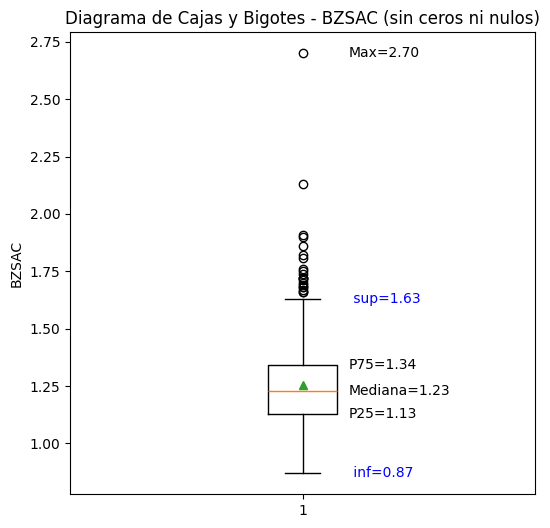

Resumen después de limpiar (sin ceros ni nulos):
Registros totales en BZSAC: 63795
Registros usados para el boxplot: 430
Registros removidos: 63365

Estadísticos (BZSAC limpio):
count    430.000000
mean       1.252767
std        0.201176
min        0.870000
25%        1.130000
50%        1.230000
75%        1.340000
max        2.700000
Name: BZSAC, dtype: float64


In [62]:
# Asegurar numérico
bzsac = pd.to_numeric(df["BZSAC"], errors="coerce")

# Remover NaN y ceros
bzsac_clean = bzsac.dropna()
bzsac_clean = bzsac_clean[bzsac_clean != 0]

min_val = bzsac_clean.min()
p25, p50, p75 = bzsac_clean.quantile([0.25, 0.5, 0.75])
max_val = bzsac_clean.max()

Q1 = bzsac_clean.quantile(0.25)
Q3 = bzsac_clean.quantile(0.75)
IQR = Q3 - Q1
# Límites de los bigotes
lower = bzsac_clean[bzsac_clean >= (Q1 - 1.5*IQR)].min()
upper = bzsac_clean[bzsac_clean <= (Q3 + 1.5*IQR)].max()

n_total = len(bzsac)
n_valid = len(bzsac_clean)
n_removed = n_total - n_valid
summary = bzsac_clean.describe(percentiles=[0.25, 0.5, 0.75])

# Graficar: una sola figura, sin estilos/colores definidos
plt.figure(figsize=(6, 6))
plt.boxplot(bzsac_clean, vert=True, showmeans=True)
plt.title("Diagrama de Cajas y Bigotes - BZSAC (sin ceros ni nulos)")
plt.ylabel("BZSAC")
# Agregar anotaciones para los percentiles
# Anotar extremos y percentiles
#plt.text(1.1, min_val, f"Min={min_val:.2f}", va="center")
plt.text(1.1, p25,    f"P25={p25:.2f}", va="center")
plt.text(1.1, p50,    f"Mediana={p50:.2f}", va="center")
plt.text(1.1, p75,    f"P75={p75:.2f}", va="center")
plt.text(1.1, max_val, f"Max={max_val:.2f}", va="center")
plt.text(1.1, lower, f" inf={lower:.2f}", va="center", color="blue")
plt.text(1.1, upper, f" sup={upper:.2f}", va="center", color="blue")

plt.show()

print("Resumen después de limpiar (sin ceros ni nulos):")
print(f"Registros totales en BZSAC: {n_total}")
print(f"Registros usados para el boxplot: {n_valid}")
print(f"Registros removidos: {n_removed}")
print("\nEstadísticos (BZSAC limpio):")
print(summary)

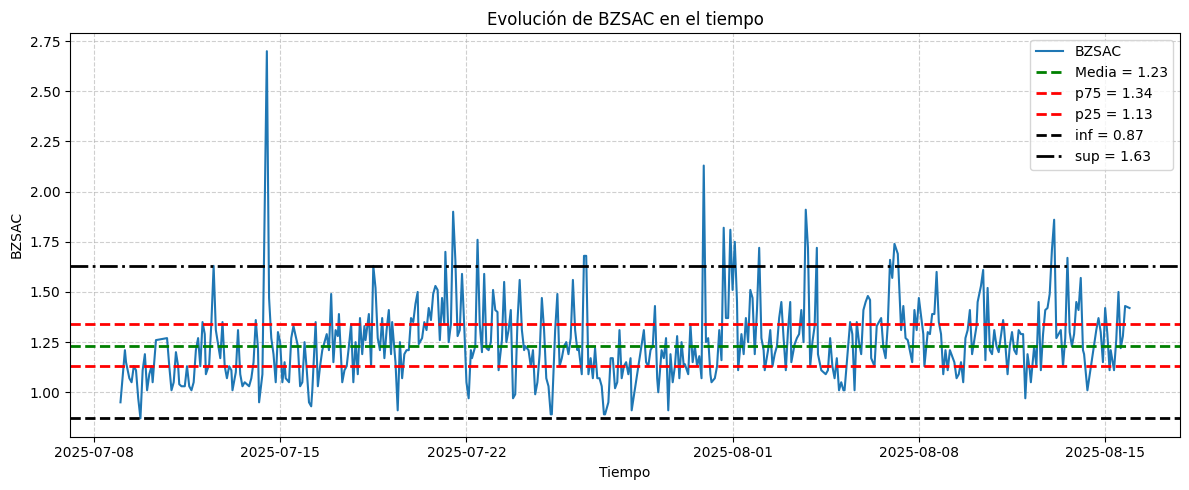

In [64]:
df["Time"] = pd.to_datetime(df["Time"], errors="coerce")


# --- 3. Limpiar BZSAC
df["BZSAC"] = pd.to_numeric(df["BZSAC"], errors="coerce")
df_clean = df.dropna(subset=["BZSAC"])
df_clean = df_clean[df_clean["BZSAC"] != 0]

# --- 4. Calcular media
mean_bzsac = df_clean["BZSAC"].mean()

# --- 5. Graficar
plt.figure(figsize=(12,5))
plt.plot(df_clean["Time"], df_clean["BZSAC"], linestyle="-", label="BZSAC")
plt.axhline(p50, color="green", linestyle="--", linewidth=2, label=f"Media = {p50:.2f}")
plt.axhline(p75, color="red", linestyle="--", linewidth=2, label=f"p75 = {p75:.2f}")
plt.axhline(p25, color="red", linestyle="--", linewidth=2, label=f"p25 = {p25:.2f}")
plt.axhline(lower, color="black", linestyle="--", linewidth=2, label=f"inf = {lower:.2f}")
plt.axhline(upper, color="black", linestyle="-.", linewidth=2, label=f"sup = {upper:.2f}")

plt.title("Evolución de BZSAC en el tiempo")
plt.xlabel("Tiempo")
plt.ylabel("BZSAC")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

La mayoría de los valores de BZSAC están concentrados entre 1.13 (P25) y 1.34 (P75).
El valor central (mediana = 1.23) indica que la mitad de las observaciones están por debajo y la otra mitad por encima de ese punto.
Estos puntos fuera de la "caja" (bigotes largos o marcadores fuera) se interpretan como posibles outliers.
Pueden deberse a errores de medición, registros anómalos o situaciones operativas excepcionales.


Normalmente se encuentra alrededor de 1.2%, lo cual refleja la eficiencia promedio de extracción.

Cuando aparecen valores muy altos (≥ 2.0), se interpretan como ineficiencias puntuales del proceso de molienda, pues indican que más sacarosa de lo esperado quedó atrapada en el bagazo.

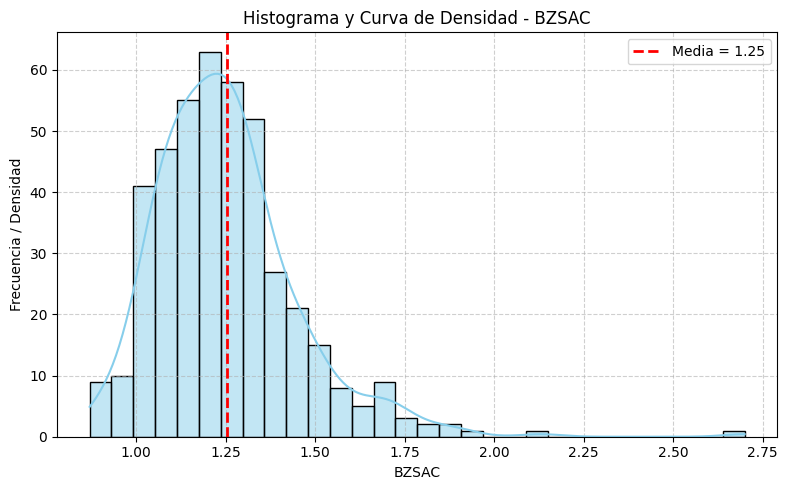

In [65]:
import seaborn as sns
# --- 3. Graficar histograma con curva de densidad
plt.figure(figsize=(8,5))
sns.histplot(df_clean["BZSAC"], bins=30, kde=True, color="skyblue", edgecolor="black")

# Línea de la media
plt.axvline(df_clean["BZSAC"].mean(), color="red", linestyle="--", linewidth=2, label=f"Media = {df_clean['BZSAC'].mean():.2f}")

plt.title("Histograma y Curva de Densidad - BZSAC")
plt.xlabel("BZSAC")
plt.ylabel("Frecuencia / Densidad")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

Si la mayoría de las barras se concentran alrededor de 1.1–1.3, significa que la mayor parte del proceso opera en ese rango.

Se extiende hacia la derecha hasta ~2.7 → eso se refleja en una cola larga en la curva (asimetría positiva).

    Cola hacia la derecha (asimetría positiva):

En algunas ocasiones el % de sacarosa se dispara (>2.0).

Eso implica pérdidas puntuales de eficiencia (más sacarosa atrapada en el bagazo).

Puede deberse a problemas operativos (ajustes de molinos, humedad alta, baja imbibición, etc.).

La asimetría positiva hacia la derecha significa que hay pocos casos en los que BZSAC es mucho más alto de lo normal, y aunque no ocurran con frecuencia, afectan el promedio y reflejan pérdidas en eficiencia.

In [66]:

print(lower, upper)

# Identificar outliers
outliers = df[(df["BZSAC"] < lower) | (df["BZSAC"] > upper)]

# Porcentaje de outliers
pct_outliers = len(outliers) / len(df) * 100
print(f"Porcentaje de outliers: {pct_outliers:.2f}%")

# Mostrar momentos donde ocurren
print("Outliers encontrados en:")
print(outliers[["Time", "BZSAC"]].head())

0.87 1.63
Porcentaje de outliers: 0.03%
Outliers encontrados en:
                     Time  BZSAC
25674 2025-07-14 12:00:00   2.70
31983 2025-07-19 07:00:00   0.00
34523 2025-07-21 05:00:00   1.70
34904 2025-07-21 12:00:00   1.90
35012 2025-07-21 14:00:00   1.66


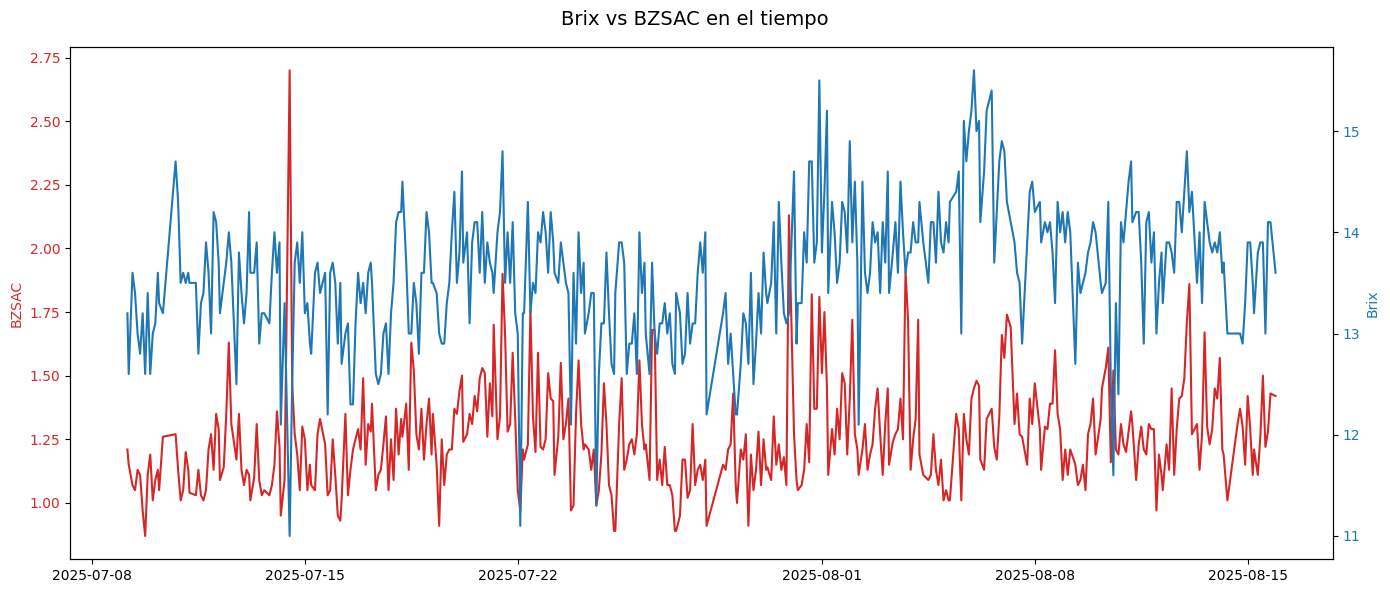

In [68]:


# Filtrar columnas necesarias
df_brix = df[['Time', 'BZSAC', '201_LECBRIXSOLUT2']].dropna()

# Gráfico
fig, ax1 = plt.subplots(figsize=(14,6))

ax1.plot(df_brix['Time'], df_brix['BZSAC'], color='tab:red', label='BZSAC (Sacarosa en Bagazo)')
ax1.set_ylabel('BZSAC', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.plot(df_brix['Time'], df_brix['201_LECBRIXSOLUT2'], color='tab:blue', label='Brix (Jugo diluido)')
ax2.set_ylabel('Brix', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.suptitle("Brix vs BZSAC en el tiempo", fontsize=14)
fig.tight_layout()
plt.show()



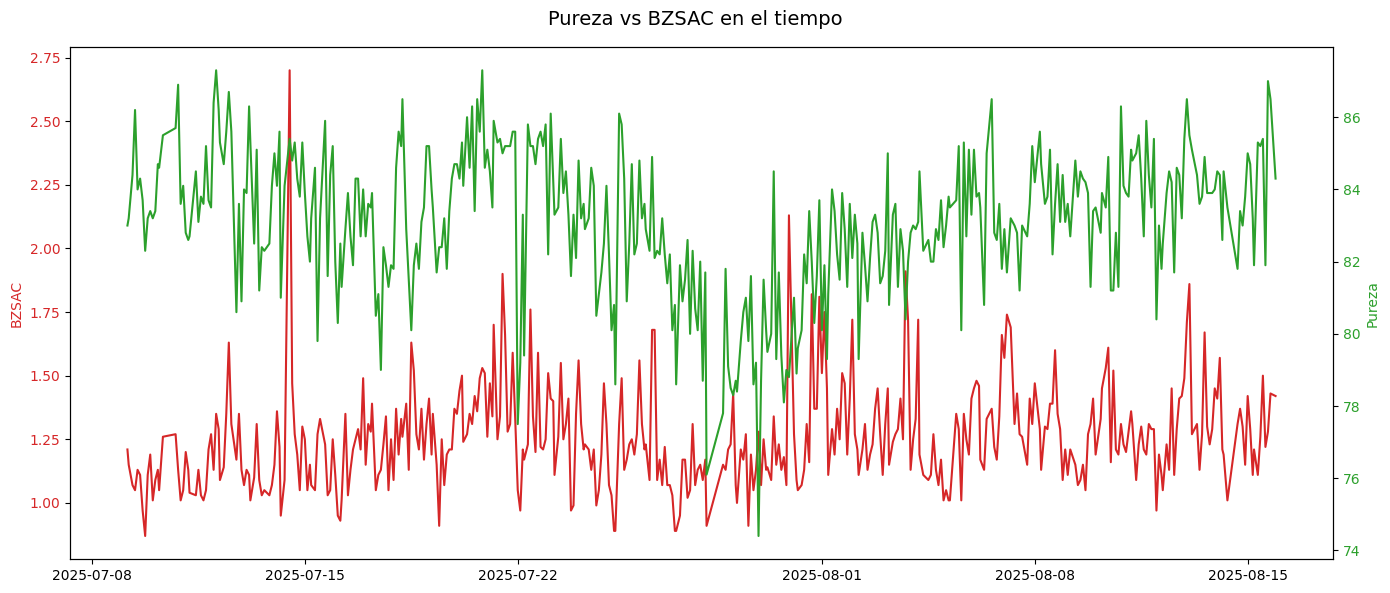

In [69]:
# Filtrar columnas necesarias
df_pureza = df[['Time', 'BZSAC', '201_PUREZAJUGDILT2']].dropna()

# Gráfico
fig, ax1 = plt.subplots(figsize=(14,6))

ax1.plot(df_pureza['Time'], df_pureza['BZSAC'], color='tab:red', label='BZSAC (Sacarosa en Bagazo)')
ax1.set_ylabel('BZSAC', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.plot(df_pureza['Time'], df_pureza['201_PUREZAJUGDILT2'], color='tab:green', label='Pureza (Jugo diluido)')
ax2.set_ylabel('Pureza', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')

fig.suptitle("Pureza vs BZSAC en el tiempo", fontsize=14)
fig.tight_layout()
plt.show()


📊 Correlaciones con BZSAC:
BZSAC                  1.000000
201_LECBRIXSOLUT2      0.441988
201_PUREZAJUGDILT2     0.274224
201_%HUMBZOT2          0.164404
201_%PUREZJUGO1EXT2    0.125280
Name: BZSAC, dtype: float64


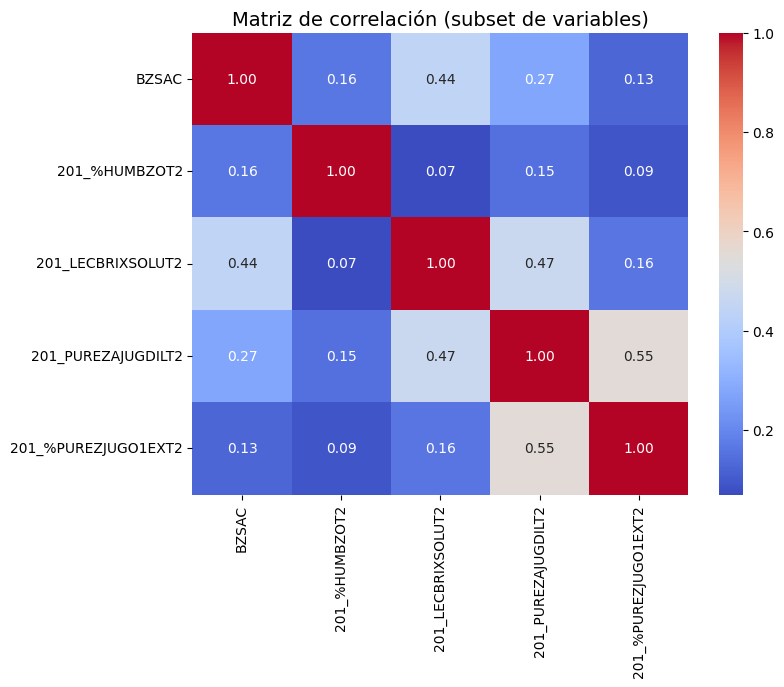


✅ Features recomendadas para el modelo de predicción:
['201_LECBRIXSOLUT2', '201_PUREZAJUGDILT2']


In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Cargar dataset ---
dxx = pd.read_csv("DatosAreaMolinos.csv", sep=";")

# --- 2. Seleccionar variables candidatas ---
variables_candidatas = [
    "BZSAC",          # Objetivo
    "201_%HUMBZOT2",      # Humedad bagazo
    "201_LECBRIXSOLUT2",  # Brix jugo diluido
    "201_PUREZAJUGDILT2", # Pureza jugo diluido
    "201_%PUREZJUGO1EXT2" # Pureza jugo primera extracción
]

# Filtrar solo las que existan en el dataset
variables_existentes = [v for v in variables_candidatas if v in dxx.columns]
df_subset = dxx[variables_existentes].copy()

# --- 3. Limpiar datos ---
# Eliminar nulos y ceros en la variable objetivo
df_subset = df_subset.dropna()
df_subset = df_subset[df_subset["BZSAC"] > 0]

# --- 4. Calcular correlaciones contra BZSAC ---
correlaciones = df_subset.corr(numeric_only=True)["BZSAC"].sort_values(ascending=False)

print("📊 Correlaciones con BZSAC:")
print(correlaciones)

# --- 5. Visualizar mapa de calor ---
plt.figure(figsize=(8,6))
sns.heatmap(df_subset.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación (subset de variables)", fontsize=14)
plt.show()

# --- 6. Selección de features ---
# Recomendación: elegir las variables con mayor correlación (positiva o negativa)
umbral = 0.2  # puedes ajustar el umbral
features_seleccionadas = correlaciones[abs(correlaciones) > umbral].index.tolist()
features_seleccionadas = [f for f in features_seleccionadas if f != "BZSAC"]

print("\n✅ Features recomendadas para el modelo de predicción:")
print(features_seleccionadas)
